# Análise de Absentismo - Caracterização Completa

## Objetivo
Caracterização detalhada do absentismo na empresa, analisando padrões temporais, por operação/segmento/categoria profissional, e identificando comportamentos de alerta em colaboradores ativos.

## Estrutura da Análise
1. **Preparação dos Dados**: Carregamento, limpeza e criação de variáveis derivadas
2. **Análise Geral**: Overview do absentismo a nível empresa
3. **Análise por Segmentação**: Operação, Segmento, Categoria Profissional, Departamento
4. **Análise Temporal**: Padrões semanais, mensais e sazonais
5. **Detecção de Padrões de Alerta**: Red flags em colaboradores ativos
6. **Visualizações e Relatório**: Dashboards e sumário executivo

---

## 1. Imports e Configurações

In [5]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Configurações
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Configuração de visualizações
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("✅ Imports e configurações carregadas com sucesso!")

✅ Imports e configurações carregadas com sucesso!


## 2. Carregamento dos Códigos e Dataset

### 2.1 Carregamento dos Códigos (Excel)

In [7]:
# Carregar códigos do Excel
codigos = pd.read_excel('códigos.xlsx')

# Renomear coluna para facilitar
codigos.columns = ['codigo', 'nivel_2', 'descricao', 'nivel_3']

# Limpar espaços
codigos['codigo'] = codigos['codigo'].str.strip()
codigos['nivel_2'] = codigos['nivel_2'].str.strip()
codigos['nivel_3'] = codigos['nivel_3'].str.strip()

print(f"✅ Códigos carregados: {len(codigos)} códigos")
print(f"\nNível 2 - Categorias: {codigos['nivel_2'].nunique()}")
print(codigos['nivel_2'].value_counts())
print(f"\nNível 3 - Agrupamento principal:")
print(codigos['nivel_3'].value_counts())

# Mostrar alguns exemplos
print("\n📋 Exemplos de códigos:")
codigos.head(10)

✅ Códigos carregados: 40 códigos

Nível 2 - Categorias: 8
nivel_2
Licenças                    11
Presença                     5
Atraso                       5
férias / feriado / folga     5
Ausências médicas            4
Inatividade                  4
Faltas injustificadas        3
Exame Escolar / Formação     3
Name: count, dtype: int64

Nível 3 - Agrupamento principal:
nivel_3
Ausência Não considerada no Absentismo    14
Falta Justificada                         10
Trabalho Pago                              9
Atraso                                     5
Falta Injustificada                        2
Name: count, dtype: int64

📋 Exemplos de códigos:


,codigo,nivel_2,descricao,nivel_3
0,Falta,Presença,Falta de Marcação por Ausência (o ELO gera ano...,Trabalho Pago
1,TrabPago,Presença,"Trabalho pago, associado ao trabalho efectuado...",Trabalho Pago
2,TrabNPago,Presença,Trabalho não pago,Ausência Não considerada no Absentismo
3,-1H,Atraso,Atraso,Atraso
4,Feriado,férias / feriado / folga,Ausência Justificada (aplicado no ELO para fer...,Trabalho Pago
5,BM,Ausências médicas,Baixa Médica (ausência inferior a 14 dias segu...,Falta Justificada
6,A15M,Atraso,Atraso,Atraso
7,FAM,Presença,Falta por Ausência de Marcação (aplicada sempr...,Trabalho Pago
8,BD2PNL,Ausências médicas,Baixa por doença paga a 50%,Falta Justificada
9,LM,Licenças,Licença de Maternidade,Ausência Não considerada no Absentismo


### 2.2 Carregamento do Dataset Principal

**Nota**: O ficheiro `combined_data.csv` deve estar no mesmo diretório que este notebook.

In [11]:
# Carregar dataset principal
print("Carregando dataset (isto pode demorar alguns segundos)...")

# Definir tipos de dados para otimizar memória
dtype_dict = {
    'login_colaborador': 'str',
    'nome_colaborador': 'str',
    'categoria_profissional': 'category',
    'segmento': 'category',
    'operacao': 'category',
    'departamento': 'category',
    'segmento_processado_codigo': 'category',
    'codigo_nivel_2': 'category',
    'Contagem_ID': 'int8',
    'Activo?': 'category'
}

# Carregar dados
df = pd.read_csv('combined_data.csv', 
                 sep=',',
                 dtype=dtype_dict,
                 parse_dates=['Data'],
                 encoding='utf-8')

# Informações básicas
print(f"✅ Dataset carregado com sucesso!")
print(f"\n📊 Dimensões: {df.shape[0]:,} linhas x {df.shape[1]} colunas")
print(f"📅 Período: {df['Data'].min().strftime('%d/%m/%Y')} a {df['Data'].max().strftime('%d/%m/%Y')}")
print(f"👥 Colaboradores únicos: {df['login_colaborador'].nunique():,}")
print(f"\n💾 Uso de memória: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Primeiras linhas
print("\n📋 Primeiras linhas do dataset:")
df.head()

Carregando dataset (isto pode demorar alguns segundos)...
✅ Dataset carregado com sucesso!

📊 Dimensões: 1,325,097 linhas x 13 colunas
📅 Período: 01/01/2024 a 30/06/2025
👥 Colaboradores únicos: 3,135

💾 Uso de memória: 345.70 MB

📋 Primeiras linhas do dataset:


,Data,login_colaborador,nome_colaborador,categoria_profissional,segmento,operacao,departamento,segmento_processado_codigo,codigo_nivel_2,Contagem_ID,DtActivacao,DtDesactivacao,Activo?
0,2024-01-01,4718,Abdoulaye Simão,ASSISTENTE DE CALL CENTER,TAAG_Canais digitais,TAAG,Direcção de Negócio,TrabNPago,Presença,2,2012-12-15,2999-12-30 00:00:00,Não
1,2024-01-01,4718,Abdoulaye Simão,ASSISTENTE DE CALL CENTER,TAAG_Canais digitais,TAAG,Direcção de Negócio,TrabPago,Presença,2,2012-12-15,2999-12-30 00:00:00,Não
2,2024-01-01,10438,Abdulay Calombo Ibrahima Aw,ASSISTENTE DE CONTACT CENTER (N3),TAAG,TAAG,Direcção de Negócio,TrabPago,Presença,2,2023-10-20,2024-01-23 00:00:00,Sim
3,2024-01-01,10438,Abdulay Calombo Ibrahima Aw,ASSISTENTE DE CONTACT CENTER (N3),TAAG,TAAG,Direcção de Negócio,TrabNPago,Presença,2,2023-10-20,2024-01-23 00:00:00,Sim
4,2024-01-01,09379,Abel Chipongue Fernando dos Santos,ASSISTENTE DE CONTACT CENTER (N1),ZAP_DTH,ZAP_DTH,Direcção de Negócio,TrabNPago,Presença,2,2021-06-01,2024-07-19 00:00:00,Sim


## 3. Preparação e Enriquecimento dos Dados

### 3.1 Merge com Códigos (Níveis 2 e 3)

In [13]:
# Fazer merge do dataset com os códigos
# Nota: segmento_processado_codigo é o código que vamos mapear

df = df.merge(
    codigos[['codigo', 'nivel_2', 'nivel_3', 'descricao']], 
    left_on='segmento_processado_codigo', 
    right_on='codigo',
    how='left'
)

# Remover coluna duplicada
df.drop('codigo', axis=1, inplace=True)

# Renomear para facilitar
df.rename(columns={
    'nivel_2': 'tipo_ausencia',
    'nivel_3': 'categoria_absentismo',
    'descricao': 'descricao_codigo'
}, inplace=True)

# Verificar merge
print(f"✅ Merge concluído!")
print(f"\nRegistros sem match: {df['tipo_ausencia'].isna().sum()}")
print(f"\nDistribuição por Categoria de Absentismo (Nível 3):")
print(df['categoria_absentismo'].value_counts())
print(f"\nDistribuição por Tipo de Ausência (Nível 2):")
print(df['tipo_ausencia'].value_counts())

✅ Merge concluído!

Registros sem match: 0

Distribuição por Categoria de Absentismo (Nível 3):
categoria_absentismo
Trabalho Pago                             718409
Ausência Não considerada no Absentismo    543857
Atraso                                     38273
Falta Justificada                          18976
Falta Injustificada                         5582
Name: count, dtype: int64

Distribuição por Tipo de Ausência (Nível 2):
tipo_ausencia
Presença                    1191033
férias / feriado / folga      57276
Atraso                        38273
Ausências médicas             18636
Licenças                       9426
Faltas injustificadas          5584
Inatividade                    2912
Exame Escolar / Formação       1957
Name: count, dtype: int64


### 3.2 Criação de Variáveis Derivadas (Temporais e Flags)

In [15]:
# Variáveis temporais
df['ano'] = df['Data'].dt.year
df['mes'] = df['Data'].dt.month
df['dia'] = df['Data'].dt.day
df['dia_semana'] = df['Data'].dt.dayofweek  # 0=Segunda, 6=Domingo
df['nome_dia_semana'] = df['Data'].dt.day_name()
df['semana_ano'] = df['Data'].dt.isocalendar().week
df['trimestre'] = df['Data'].dt.quarter
df['ano_mes'] = df['Data'].dt.to_period('M')

# Semana do mês (1-5)
df['semana_mes'] = ((df['dia'] - 1) // 7) + 1

# Flags úteis
df['is_segunda'] = (df['dia_semana'] == 0).astype(int)
df['is_sexta'] = (df['dia_semana'] == 4).astype(int)
df['is_fim_semana'] = (df['dia_semana'] >= 5).astype(int)

# Início e fim de mês (primeiros 7 dias = início, últimos 7 = fim)
df['is_inicio_mes'] = (df['dia'] <= 7).astype(int)
df['is_fim_mes'] = (df['dia'] >= 23).astype(int)  # Aproximado para todos os meses

# Flags de tipo de ausência (para análises rápidas)
df['is_falta_injustificada'] = (df['categoria_absentismo'] == 'Falta Injustificada').astype(int)
df['is_falta_justificada'] = (df['categoria_absentismo'] == 'Falta Justificada').astype(int)
df['is_atraso'] = (df['categoria_absentismo'] == 'Atraso').astype(int)
df['is_trabalho_pago'] = (df['categoria_absentismo'] == 'Trabalho Pago').astype(int)
df['is_ausencia_nao_contada'] = (df['categoria_absentismo'] == 'Ausência Não considerada no Absentismo').astype(int)

# Flag de colaborador ativo
df['is_ativo'] = (df['Activo?'] == 'Sim').astype(int)

print("✅ Variáveis derivadas criadas com sucesso!")
print(f"\n📅 Período completo: {df['ano_mes'].min()} a {df['ano_mes'].max()}")
print(f"\nDistribuição por dia da semana:")
print(df['nome_dia_semana'].value_counts())
print(f"\n👥 Colaboradores ativos: {df[df['is_ativo']==1]['login_colaborador'].nunique():,}")
print(f"👥 Colaboradores inativos: {df[df['is_ativo']==0]['login_colaborador'].nunique():,}")

✅ Variáveis derivadas criadas com sucesso!

📅 Período completo: 2024-01 a 2025-06

Distribuição por dia da semana:
nome_dia_semana
Monday       216629
Thursday     214852
Tuesday      213808
Wednesday    213232
Friday       211376
Saturday     134075
Sunday       121125
Name: count, dtype: int64

👥 Colaboradores ativos: 1,937
👥 Colaboradores inativos: 1,198


In [17]:
df['Data'].min(), df['Data'].max()


(Timestamp('2024-01-01 00:00:00'), Timestamp('2025-06-30 00:00:00'))

In [19]:
df['Data'].nunique()


547

---

## 4. FASE 2: Caracterização Geral do Absentismo (Nível Empresa)

### 4.1 Overview Geral - KPIs Principais

In [21]:
# KPIs Gerais
print("="*80)
print("📊 KPIs PRINCIPAIS - OVERVIEW GERAL")
print("="*80)

# Total de registros
total_registros = len(df)
print(f"\n1️⃣ Total de registros: {total_registros:,}")

# Período
print(f"2️⃣ Período analisado: {df['Data'].min().strftime('%d/%m/%Y')} a {df['Data'].max().strftime('%d/%m/%Y')}")
dias_total = (df['Data'].max() - df['Data'].min()).days + 1
print(f"   Total de dias: {dias_total}")

# Colaboradores
total_colaboradores = df['login_colaborador'].nunique()
colaboradores_ativos = df[df['is_ativo']==1]['login_colaborador'].nunique()
colaboradores_inativos = df[df['is_ativo']==0]['login_colaborador'].nunique()
print(f"\n3️⃣ Colaboradores:")
print(f"   Total únicos: {total_colaboradores:,}")
print(f"   Ativos: {colaboradores_ativos:,} ({colaboradores_ativos/total_colaboradores*100:.1f}%)")
print(f"   Inativos: {colaboradores_inativos:,} ({colaboradores_inativos/total_colaboradores*100:.1f}%)")

# Distribuição por categoria de absentismo (Nível 3)
print(f"\n4️⃣ Distribuição por Categoria de Absentismo (Nível 3):")
dist_nivel3 = df['categoria_absentismo'].value_counts()
for cat, count in dist_nivel3.items():
    pct = count / total_registros * 100
    print(f"   {cat}: {count:,} ({pct:.2f}%)")

# Taxa de absentismo (excluindo "Ausência Não considerada" e "Trabalho Pago")
registros_absentismo = df[~df['categoria_absentismo'].isin(['Ausência Não considerada no Absentismo', 'Trabalho Pago'])]
taxa_absentismo = len(registros_absentismo) / total_registros * 100

print(f"\n5️⃣ Taxa de Absentismo Geral (excluindo ausências não contadas e trabalho pago):")
print(f"   {taxa_absentismo:.2f}% dos registros")
print(f"   {len(registros_absentismo):,} registros de absentismo")

# Faltas justificadas vs injustificadas
faltas_justificadas = df['is_falta_justificada'].sum()
faltas_injustificadas = df['is_falta_injustificada'].sum()
atrasos = df['is_atraso'].sum()

print(f"\n6️⃣ Breakdown de Absentismo:")
print(f"   Faltas Justificadas: {faltas_justificadas:,} ({faltas_justificadas/total_registros*100:.2f}%)")
print(f"   Faltas Injustificadas: {faltas_injustificadas:,} ({faltas_injustificadas/total_registros*100:.2f}%)")
print(f"   Atrasos: {atrasos:,} ({atrasos/total_registros*100:.2f}%)")

print("\n" + "="*80)

📊 KPIs PRINCIPAIS - OVERVIEW GERAL

1️⃣ Total de registros: 1,325,097
2️⃣ Período analisado: 01/01/2024 a 30/06/2025
   Total de dias: 547

3️⃣ Colaboradores:
   Total únicos: 3,135
   Ativos: 1,937 (61.8%)
   Inativos: 1,198 (38.2%)

4️⃣ Distribuição por Categoria de Absentismo (Nível 3):
   Trabalho Pago: 718,409 (54.22%)
   Ausência Não considerada no Absentismo: 543,857 (41.04%)
   Atraso: 38,273 (2.89%)
   Falta Justificada: 18,976 (1.43%)
   Falta Injustificada: 5,582 (0.42%)

5️⃣ Taxa de Absentismo Geral (excluindo ausências não contadas e trabalho pago):
   4.74% dos registros
   62,831 registros de absentismo

6️⃣ Breakdown de Absentismo:
   Faltas Justificadas: 18,976 (1.43%)
   Faltas Injustificadas: 5,582 (0.42%)
   Atrasos: 38,273 (2.89%)



### 4.2 Visualizações - Distribuição Geral

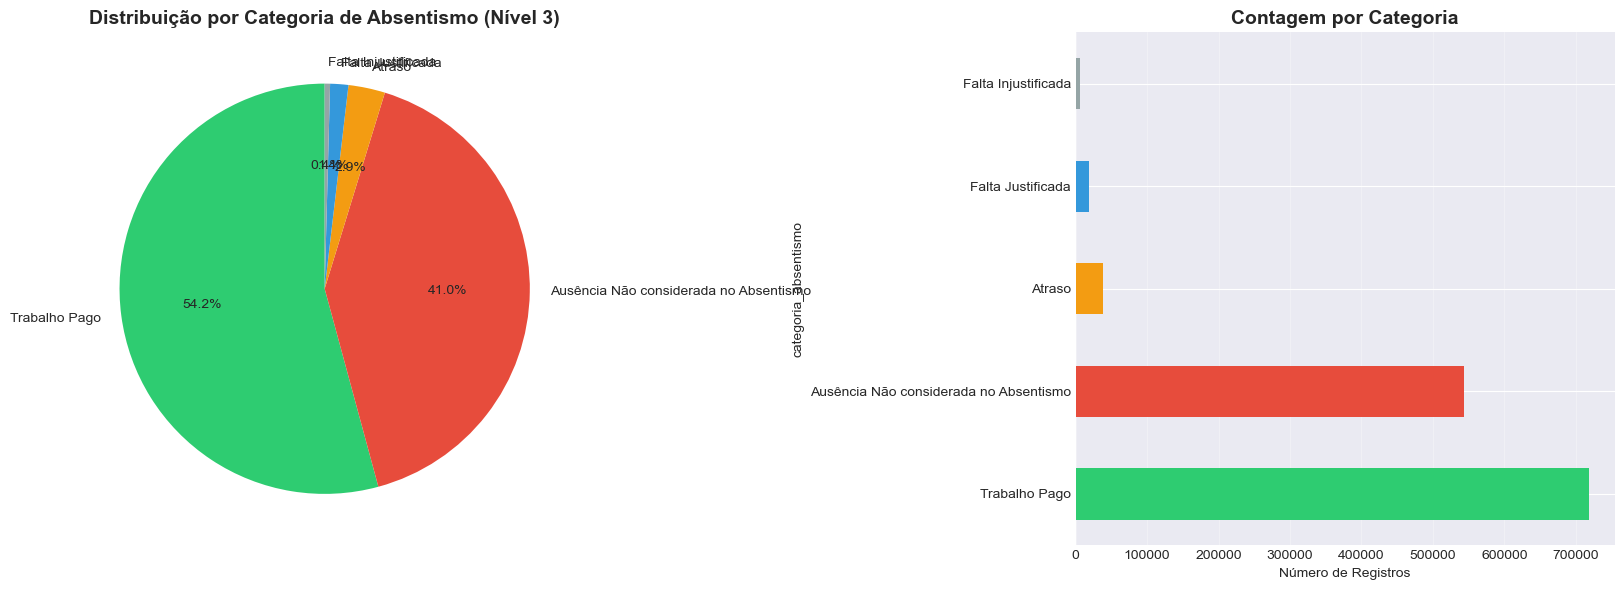

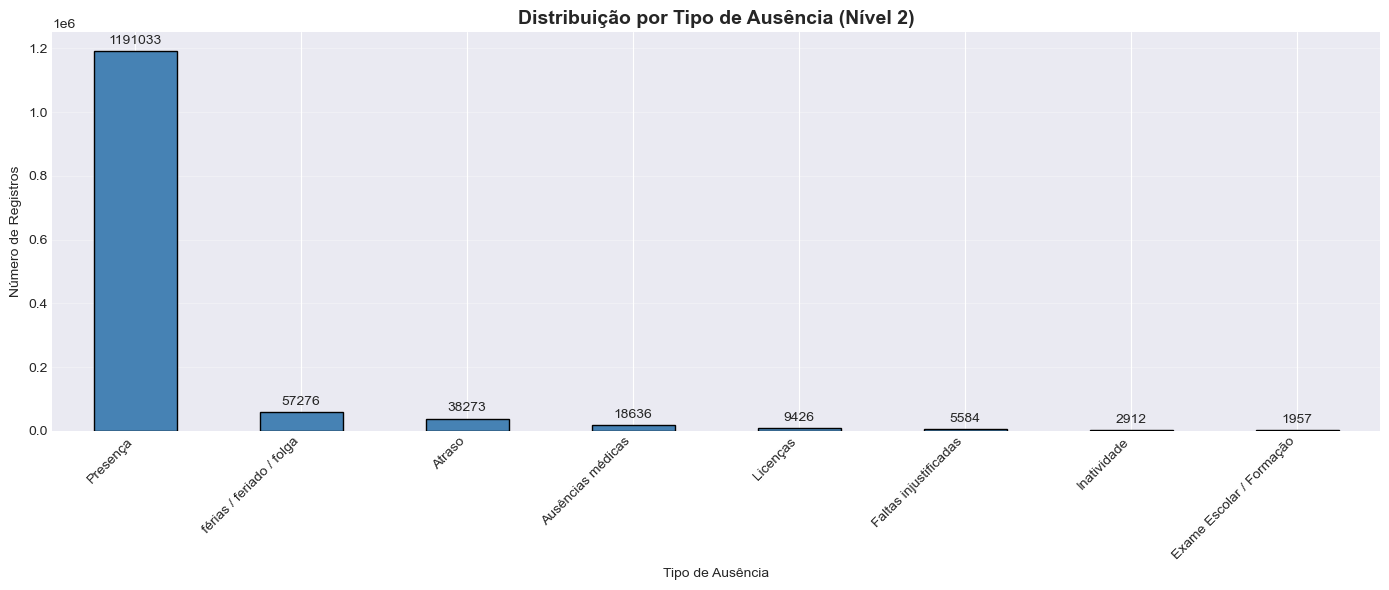

In [24]:
# Gráfico 1: Distribuição por Categoria de Absentismo (Nível 3)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pizza
dist_nivel3 = df['categoria_absentismo'].value_counts()
colors = ['#2ecc71', '#e74c3c', '#f39c12', '#3498db', '#95a5a6']
axes[0].pie(dist_nivel3.values, labels=dist_nivel3.index, autopct='%1.1f%%', 
            startangle=90, colors=colors)
axes[0].set_title('Distribuição por Categoria de Absentismo (Nível 3)', fontsize=14, fontweight='bold')

# Barras
dist_nivel3.plot(kind='barh', ax=axes[1], color=colors)
axes[1].set_title('Contagem por Categoria', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Número de Registros')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Gráfico 2: Distribuição por Tipo de Ausência (Nível 2)
fig, ax = plt.subplots(figsize=(14, 6))
dist_nivel2 = df['tipo_ausencia'].value_counts()
dist_nivel2.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
ax.set_title('Distribuição por Tipo de Ausência (Nível 2)', fontsize=14, fontweight='bold')
ax.set_xlabel('Tipo de Ausência')
ax.set_ylabel('Número de Registros')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.tight_layout()
plt.show()

### 4.3 Evolução Temporal do Absentismo

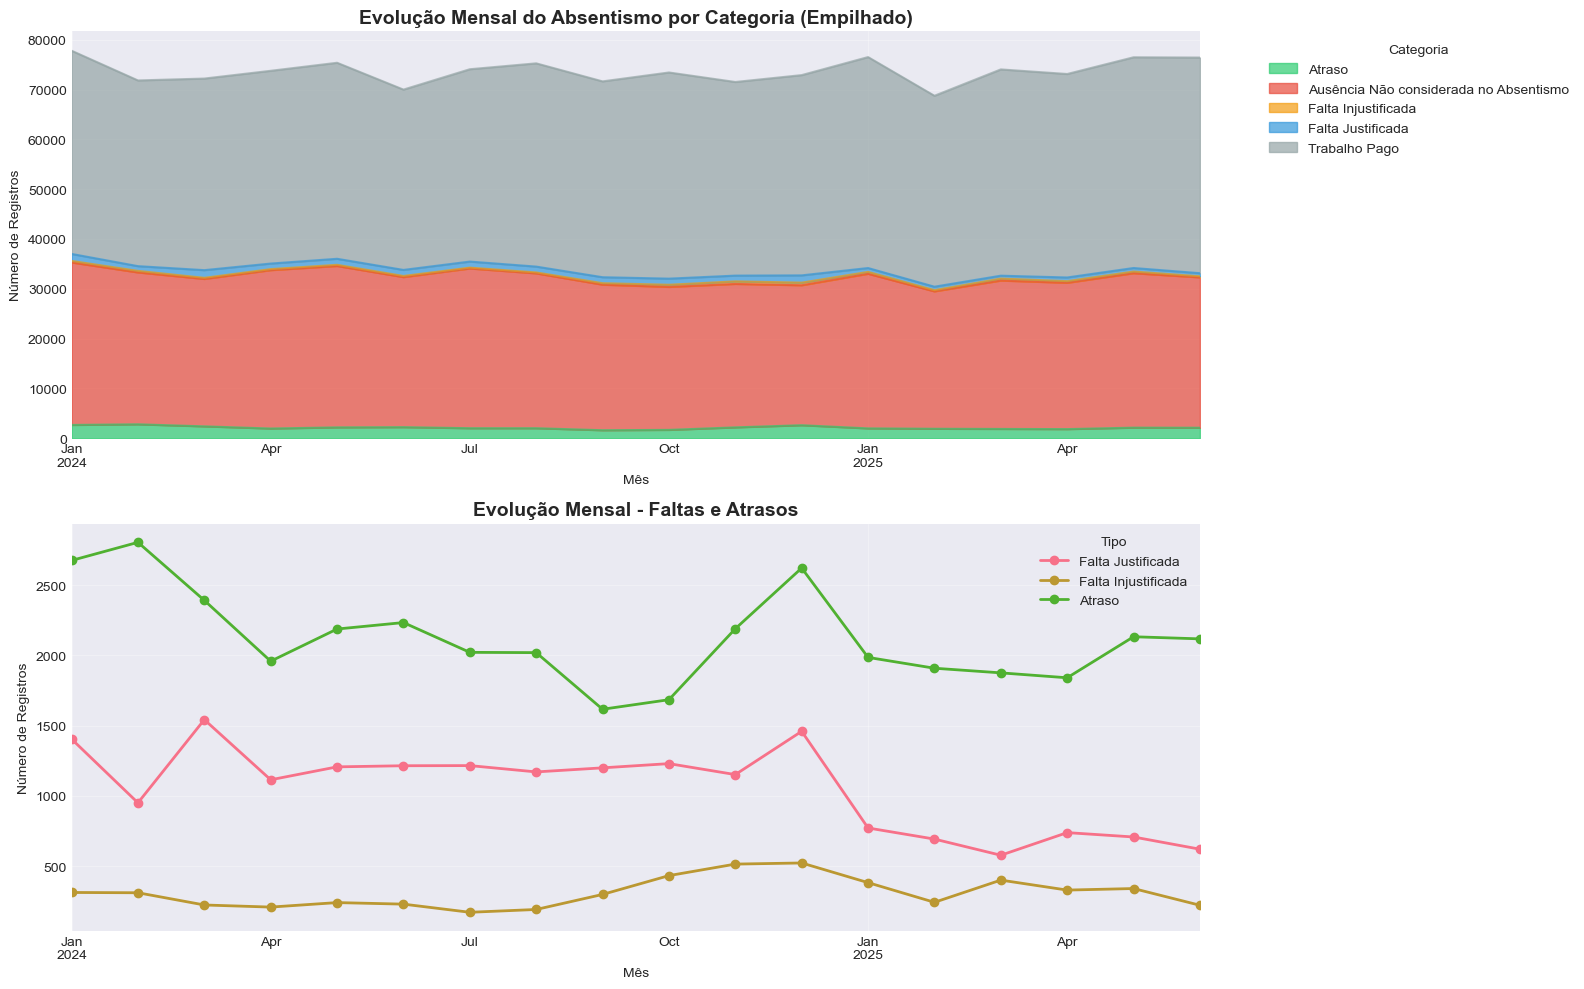


📊 Resumo Mensal - Faltas e Atrasos:
categoria_absentismo  Atraso  Falta Injustificada  Falta Justificada  Total
ano_mes                                                                    
2024-01                 2676                  313               1405   4394
2024-02                 2805                  311                951   4067
2024-03                 2392                  224               1543   4159
2024-04                 1959                  209               1115   3283
2024-05                 2188                  241               1207   3636
2024-06                 2234                  230               1215   3679
2024-07                 2022                  172               1216   3410
2024-08                 2020                  192               1171   3383
2024-09                 1617                  299               1200   3116
2024-10                 1685                  433               1230   3348
2024-11                 2190                  515  

In [26]:
# Evolução mensal por categoria de absentismo
evolucao_mensal = df.groupby(['ano_mes', 'categoria_absentismo']).size().unstack(fill_value=0)

# Gráfico de evolução temporal
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Gráfico 1: Evolução de todas as categorias (empilhado)
evolucao_mensal.plot(kind='area', stacked=True, ax=axes[0], alpha=0.7, 
                     color=['#2ecc71', '#e74c3c', '#f39c12', '#3498db', '#95a5a6'])
axes[0].set_title('Evolução Mensal do Absentismo por Categoria (Empilhado)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Mês')
axes[0].set_ylabel('Número de Registros')
axes[0].legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(alpha=0.3)

# Gráfico 2: Apenas Faltas e Atrasos (mais visível)
categorias_interesse = ['Falta Justificada', 'Falta Injustificada', 'Atraso']
evolucao_faltas = evolucao_mensal[categorias_interesse]
evolucao_faltas.plot(kind='line', ax=axes[1], marker='o', linewidth=2)
axes[1].set_title('Evolução Mensal - Faltas e Atrasos', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Mês')
axes[1].set_ylabel('Número de Registros')
axes[1].legend(title='Tipo')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Tabela resumo mensal
print("\n📊 Resumo Mensal - Faltas e Atrasos:")
resumo_mensal = df[df['categoria_absentismo'].isin(categorias_interesse)].groupby(['ano_mes', 'categoria_absentismo']).size().unstack(fill_value=0)
resumo_mensal['Total'] = resumo_mensal.sum(axis=1)
print(resumo_mensal)

---

## 5. FASE 3: Análise por Segmentação

### 5.1 Análise por Operação

📊 ANÁLISE POR OPERAÇÃO

1️⃣ Distribuição de Registros por Operação:
   Unitel Alpha: 338,605 (25.55%)
   TAAG: 219,189 (16.54%)
   ZAP_DTH: 193,391 (14.59%)
   ZAP Canais Digitais: 84,981 (6.41%)
   ZAP Fibra: 78,229 (5.90%)
   Business Support: 66,694 (5.03%)
   Unitel Money - BRIGADISTAS Outsourcing: 38,169 (2.88%)
   UNITEL NET CASA 5G_Luanda_ Outsourcing: 29,074 (2.19%)
   Unitel Money: 24,105 (1.82%)
   Unitel Village: 21,009 (1.59%)
   BFA: 19,260 (1.45%)
   Nossa Seguros: 16,943 (1.28%)
   Actividades Corporativas: 15,804 (1.19%)
   ZAP - Outbound: 15,358 (1.16%)
   Unitel – Net Casa: 13,334 (1.01%)
   Business Operations: 11,907 (0.90%)
   Empresa Nacional de Bilhética Integrada: 10,848 (0.82%)
   Nossa Seguros  - Outsourcing: 10,267 (0.77%)
   Unitel - Net Casa Suporte Técnico : 9,325 (0.70%)
   BIC: 9,156 (0.69%)
   Unitel Money Agentes: 8,843 (0.67%)
   Pumangol: 6,767 (0.51%)
   Taag - BackOffice: 6,652 (0.50%)
   Atendimento Partilhados: 6,542 (0.49%)
   BPC: 5,597 (0.42%)

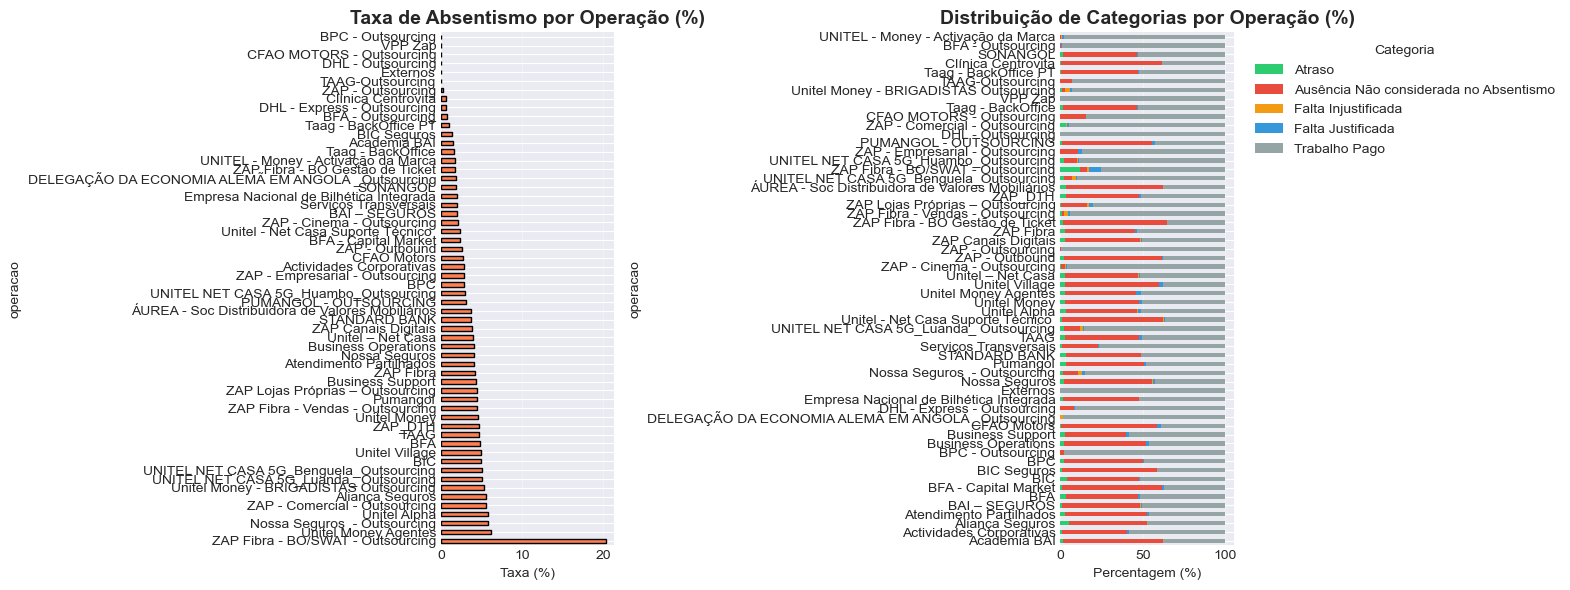

In [28]:
# Análise por Operação
print("="*80)
print("📊 ANÁLISE POR OPERAÇÃO")
print("="*80)

# Distribuição de registros por operação
print("\n1️⃣ Distribuição de Registros por Operação:")
dist_operacao = df['operacao'].value_counts()
for op, count in dist_operacao.items():
    pct = count / len(df) * 100
    print(f"   {op}: {count:,} ({pct:.2f}%)")

# Taxa de absentismo por operação
print("\n2️⃣ Taxa de Absentismo por Operação (Faltas + Atrasos):")
absentismo_operacao = df[df['categoria_absentismo'].isin(['Falta Justificada', 'Falta Injustificada', 'Atraso'])].groupby('operacao').size()
total_operacao = df.groupby('operacao').size()
taxa_operacao = (absentismo_operacao / total_operacao * 100).sort_values(ascending=False)

for op, taxa in taxa_operacao.items():
    print(f"   {op}: {taxa:.2f}%")

# Breakdown por tipo de ausência por operação
print("\n3️⃣ Breakdown por Tipo de Ausência:")
breakdown_operacao = df.groupby(['operacao', 'categoria_absentismo']).size().unstack(fill_value=0)
breakdown_operacao_pct = breakdown_operacao.div(breakdown_operacao.sum(axis=1), axis=0) * 100
print(breakdown_operacao_pct.round(2))

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Taxa de absentismo por operação
taxa_operacao.plot(kind='barh', ax=axes[0], color='coral', edgecolor='black')
axes[0].set_title('Taxa de Absentismo por Operação (%)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Taxa (%)')
axes[0].grid(axis='x', alpha=0.3)

# Gráfico 2: Distribuição por categoria (empilhado)
breakdown_operacao_pct.plot(kind='barh', stacked=True, ax=axes[1], 
                            color=['#2ecc71', '#e74c3c', '#f39c12', '#3498db', '#95a5a6'])
axes[1].set_title('Distribuição de Categorias por Operação (%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Percentagem (%)')
axes[1].legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)

### 5.2 Análise por Segmento (Top 15)

📊 ANÁLISE POR SEGMENTO (Top 15)

1️⃣ Taxa de Absentismo por Segmento (Faltas + Atrasos) - Top 15:
   MLVC+MVC: 8.17%
   HVC + Premium: 5.72%
   VLVC+LVC: 5.69%
   Unitel Money - BRIGADISTAS Outsourcing: 5.28%
   Whatsapp: 5.20%
   TAAG: 5.07%
   TAAG_Canais digitais: 5.01%
   TAAG_Inbound - Geral: 4.96%
   Unitel Money: 4.87%
   ZAP_DTH: 4.62%
   Outbound: 4.59%
   Zap Fibra: 4.56%
   Ucall: 3.97%
   ZAP Whatsapp: 3.83%
   ZAP Fibra - BO/LAI: 3.48%


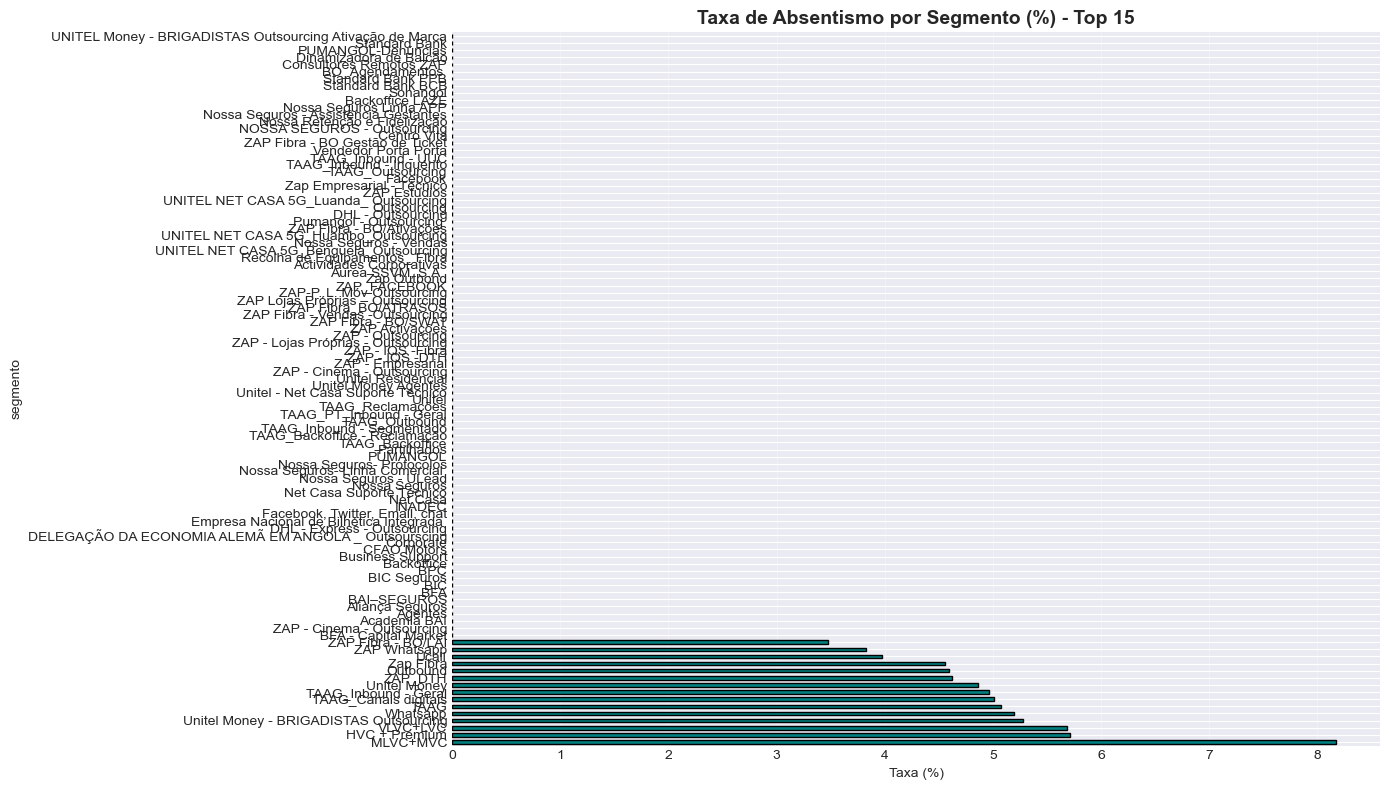

In [30]:
# Análise por Segmento (Top 15 segmentos com mais registros)
print("="*80)
print("📊 ANÁLISE POR SEGMENTO (Top 15)")
print("="*80)

# Top 15 segmentos
top_segmentos = df['segmento'].value_counts().head(15).index
df_top_segmentos = df[df['segmento'].isin(top_segmentos)]

# Taxa de absentismo por segmento
print("\n1️⃣ Taxa de Absentismo por Segmento (Faltas + Atrasos) - Top 15:")
absentismo_segmento = df_top_segmentos[df_top_segmentos['categoria_absentismo'].isin(['Falta Justificada', 'Falta Injustificada', 'Atraso'])].groupby('segmento').size()
total_segmento = df_top_segmentos.groupby('segmento').size()
taxa_segmento = (absentismo_segmento / total_segmento * 100).sort_values(ascending=False)

for seg, taxa in taxa_segmento.head(15).items():
    print(f"   {seg}: {taxa:.2f}%")

# Visualização
fig, ax = plt.subplots(figsize=(14, 8))
taxa_segmento.plot(kind='barh', ax=ax, color='teal', edgecolor='black')
ax.set_title('Taxa de Absentismo por Segmento (%) - Top 15', fontsize=14, fontweight='bold')
ax.set_xlabel('Taxa (%)')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*80)

### 5.3 Análise por Categoria Profissional

📊 ANÁLISE POR CATEGORIA PROFISSIONAL

1️⃣ Distribuição de Registros por Categoria Profissional:
   ASSISTENTE DE CONTACT CENTER (N1): 436,666 (32.95%)
   ASSISTENTE DE CONTACT CENTER (N3): 320,784 (24.21%)
   ASSISTENTE DE CONTACT CENTER (N2): 224,771 (16.96%)
   DELEGADO COMERCIAL: 41,598 (3.14%)
   ASSISTENTE DE CALL CENTER: 41,327 (3.12%)
   SUPERVISOR OPERACIONAL: 36,781 (2.78%)
   BRIGADISTA: 35,708 (2.69%)
   AUXILIAR DE LIMPEZA: 22,884 (1.73%)
   ASSISTENTE DE CONTACT CENTER (N4): 18,948 (1.43%)
   TÉCNICO DE GESTÃO DE QUALIDADE: 12,470 (0.94%)

2️⃣ Taxa de Absentismo por Categoria Profissional (Top 10):
   BRIGADISTA: 5.63%
   DELEGADO COMERCIAL: 5.58%
   ASSISTENTE DE CONTACT CENTER (N1): 5.31%
   ASSISTENTE DE CALL CENTER: 4.80%
   ASSISTENTE DE CONTACT CENTER (N3): 4.68%
   ASSISTENTE DE CONTACT CENTER (N2): 4.62%
   AUXILIAR DE LIMPEZA: 3.47%
   TÉCNICO DE GESTÃO DE QUALIDADE: 3.34%
   SUPERVISOR OPERACIONAL: 3.21%
   ASSISTENTE DE CONTACT CENTER (N4): 2.59%
   ADMINISTRADO

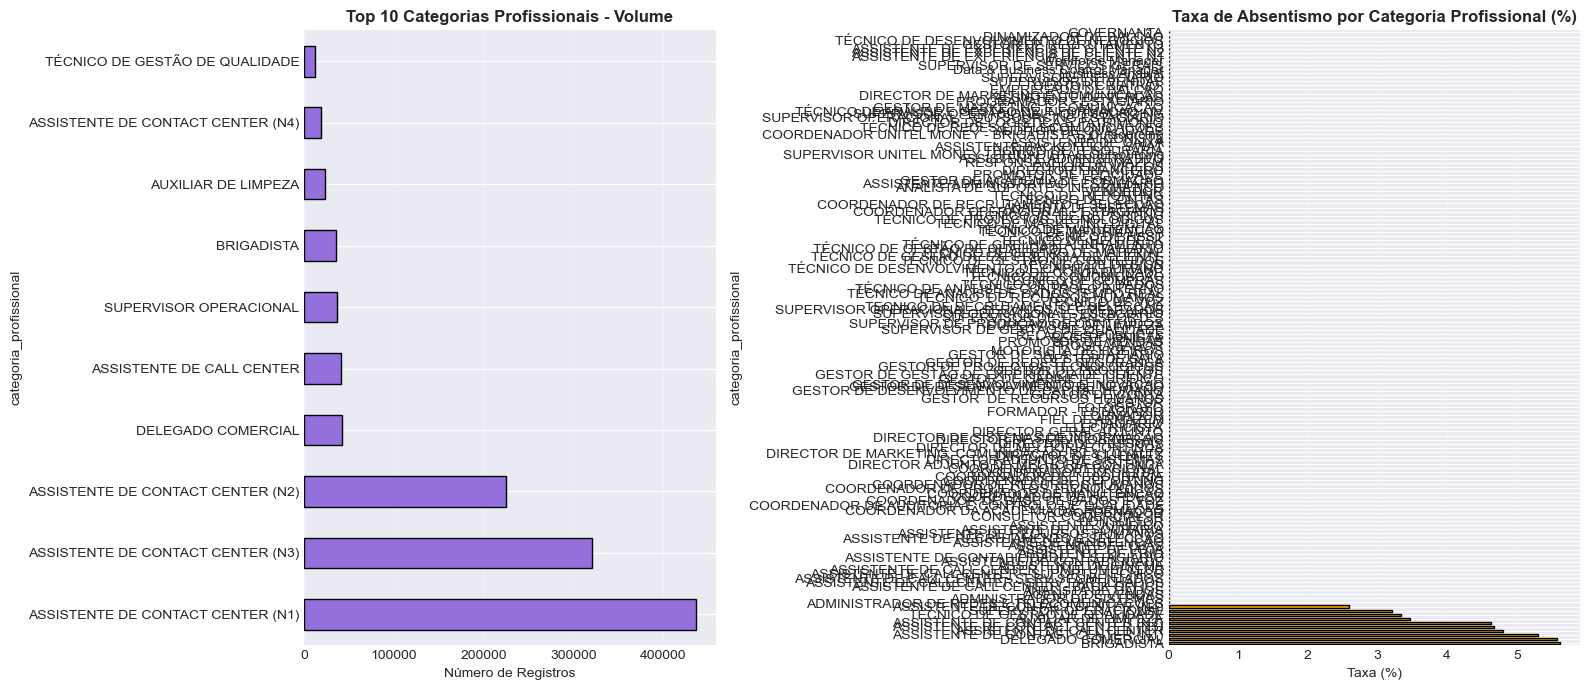

In [32]:
# Análise por Categoria Profissional
print("="*80)
print("📊 ANÁLISE POR CATEGORIA PROFISSIONAL")
print("="*80)

# Distribuição
print("\n1️⃣ Distribuição de Registros por Categoria Profissional:")
dist_categoria = df['categoria_profissional'].value_counts().head(10)
for cat, count in dist_categoria.items():
    pct = count / len(df) * 100
    print(f"   {cat}: {count:,} ({pct:.2f}%)")

# Taxa de absentismo
print("\n2️⃣ Taxa de Absentismo por Categoria Profissional (Top 10):")
top_categorias = df['categoria_profissional'].value_counts().head(10).index
df_top_cat = df[df['categoria_profissional'].isin(top_categorias)]

absentismo_cat = df_top_cat[df_top_cat['categoria_absentismo'].isin(['Falta Justificada', 'Falta Injustificada', 'Atraso'])].groupby('categoria_profissional').size()
total_cat = df_top_cat.groupby('categoria_profissional').size()
taxa_cat = (absentismo_cat / total_cat * 100).sort_values(ascending=False)

for cat, taxa in taxa_cat.items():
    print(f"   {cat}: {taxa:.2f}%")

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Gráfico 1: Distribuição
dist_categoria.plot(kind='barh', ax=axes[0], color='mediumpurple', edgecolor='black')
axes[0].set_title('Top 10 Categorias Profissionais - Volume', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Número de Registros')
axes[0].grid(axis='x', alpha=0.3)

# Gráfico 2: Taxa de absentismo
taxa_cat.plot(kind='barh', ax=axes[1], color='orange', edgecolor='black')
axes[1].set_title('Taxa de Absentismo por Categoria Profissional (%)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Taxa (%)')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)

---

## 6. FASE 4: Análise Temporal e Padrões de Calendário

### 6.1 Padrões Semanais (Dia da Semana)

📊 PADRÕES SEMANAIS - DIA DA SEMANA

1️⃣ Distribuição de Faltas e Atrasos por Dia da Semana:
   Monday: 9,797 (15.59%)
   Tuesday: 9,630 (15.33%)
   Wednesday: 9,530 (15.17%)
   Thursday: 9,506 (15.13%)
   Friday: 9,691 (15.42%)
   Saturday: 7,897 (12.57%)
   Sunday: 6,780 (10.79%)

2️⃣ Breakdown por Categoria:
categoria_absentismo  Atraso  Falta Injustificada  Falta Justificada
nome_dia_semana                                                     
Monday                  6295                  720               2782
Tuesday                 5942                  834               2854
Wednesday               5767                  855               2908
Thursday                5753                  823               2930
Friday                  5871                  872               2948
Saturday                4580                  938               2379
Sunday                  4065                  540               2175

3️⃣ Comparação Segunda vs Sexta:
   Segundas-feiras: 9,797 (15.59%

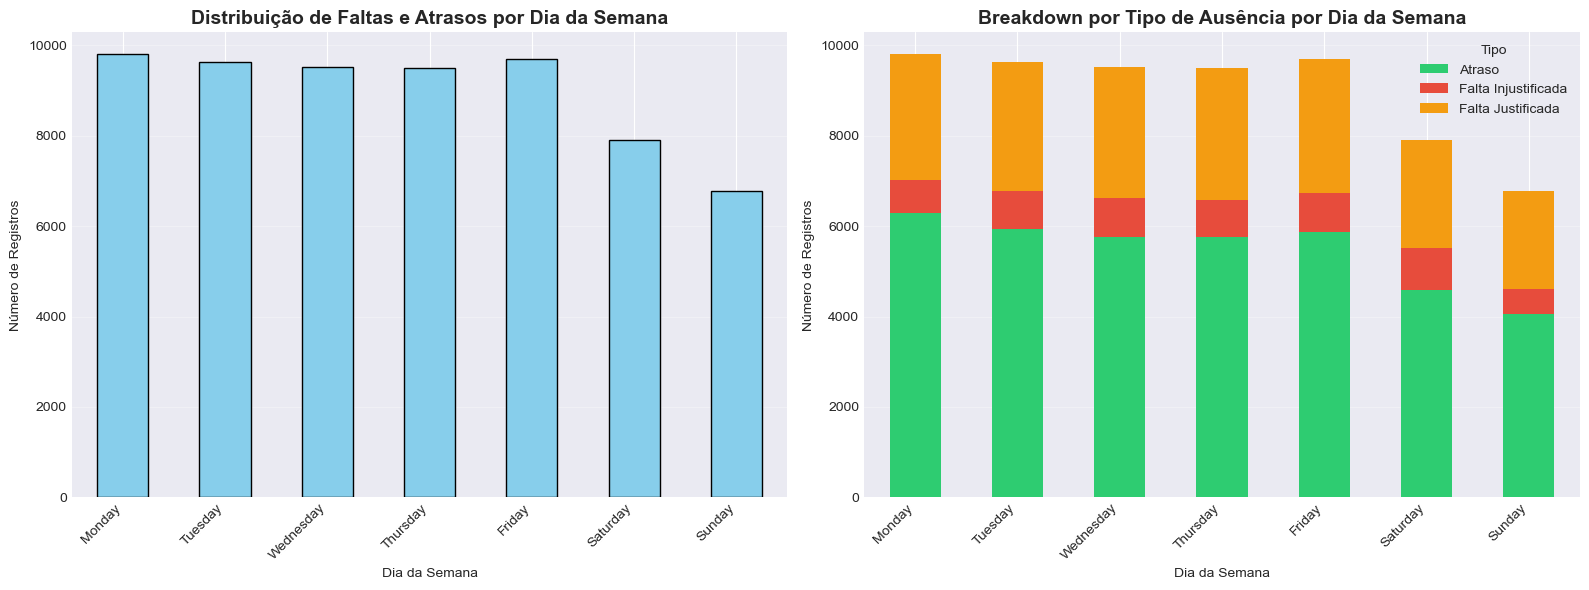

In [34]:
# Análise de padrões semanais
print("="*80)
print("📊 PADRÕES SEMANAIS - DIA DA SEMANA")
print("="*80)

# Análise geral por dia da semana
dias_ordem = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Apenas faltas e atrasos
df_faltas_atrasos = df[df['categoria_absentismo'].isin(['Falta Justificada', 'Falta Injustificada', 'Atraso'])]

# Distribuição por dia da semana
print("\n1️⃣ Distribuição de Faltas e Atrasos por Dia da Semana:")
dist_dia_semana = df_faltas_atrasos['nome_dia_semana'].value_counts().reindex(dias_ordem)
for dia, count in dist_dia_semana.items():
    pct = count / len(df_faltas_atrasos) * 100
    print(f"   {dia}: {count:,} ({pct:.2f}%)")

# Breakdown por categoria
print("\n2️⃣ Breakdown por Categoria:")
breakdown_dia = df_faltas_atrasos.groupby(['nome_dia_semana', 'categoria_absentismo']).size().unstack(fill_value=0).reindex(dias_ordem)
print(breakdown_dia)

# Estatísticas específicas: Segunda vs Sexta
seg_total = df_faltas_atrasos[df_faltas_atrasos['is_segunda'] == 1].shape[0]
sex_total = df_faltas_atrasos[df_faltas_atrasos['is_sexta'] == 1].shape[0]
outros_dias = len(df_faltas_atrasos) - seg_total - sex_total

print(f"\n3️⃣ Comparação Segunda vs Sexta:")
print(f"   Segundas-feiras: {seg_total:,} ({seg_total/len(df_faltas_atrasos)*100:.2f}%)")
print(f"   Sextas-feiras: {sex_total:,} ({sex_total/len(df_faltas_atrasos)*100:.2f}%)")
print(f"   Outros dias: {outros_dias:,} ({outros_dias/len(df_faltas_atrasos)*100:.2f}%)")

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Distribuição total por dia
dist_dia_semana.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Distribuição de Faltas e Atrasos por Dia da Semana', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Dia da Semana')
axes[0].set_ylabel('Número de Registros')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Gráfico 2: Breakdown empilhado
breakdown_dia.plot(kind='bar', stacked=True, ax=axes[1], 
                   color=['#2ecc71', '#e74c3c', '#f39c12'])
axes[1].set_title('Breakdown por Tipo de Ausência por Dia da Semana', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Dia da Semana')
axes[1].set_ylabel('Número de Registros')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].legend(title='Tipo')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)

### 6.2 Padrões Mensais (Início, Meio, Fim do Mês)

📊 PADRÕES MENSAIS - INÍCIO, MEIO, FIM DO MÊS

1️⃣ Distribuição de Faltas e Atrasos por Período do Mês:
   Início (1-7): 15,483 (24.64%)
   Meio-Início (8-15): 16,151 (25.71%)
   Meio-Fim (16-22): 13,711 (21.82%)
   Fim (23+): 17,486 (27.83%)

2️⃣ Breakdown por Tipo de Ausência:
categoria_absentismo  Atraso  Falta Injustificada  Falta Justificada
periodo_mes                                                         
Início (1-7)            9543                 1389               4551
Meio-Início (8-15)      9938                 1442               4771
Meio-Fim (16-22)        8364                 1199               4148
Fim (23+)              10428                 1552               5506

3️⃣ Distribuição por Semana do Mês (1-5):
categoria_absentismo  Atraso  Falta Injustificada  Falta Justificada
semana_mes                                                          
1                       9543                 1389               4551
2                       8690                 1256        

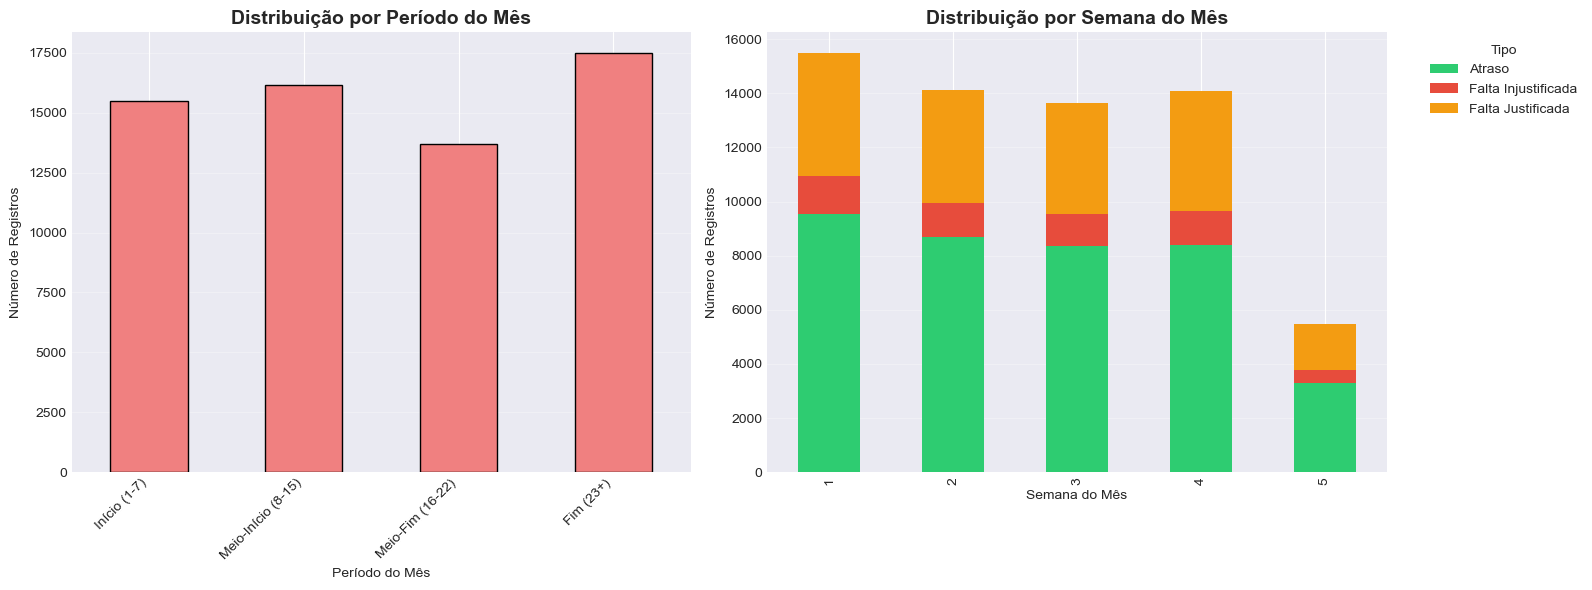

In [36]:
# Análise de padrões mensais
print("="*80)
print("📊 PADRÕES MENSAIS - INÍCIO, MEIO, FIM DO MÊS")
print("="*80)

# Criar categorias
def categorizar_periodo_mes(dia):
    if dia <= 7:
        return 'Início (1-7)'
    elif dia <= 15:
        return 'Meio-Início (8-15)'
    elif dia <= 22:
        return 'Meio-Fim (16-22)'
    else:
        return 'Fim (23+)'

df_faltas_atrasos['periodo_mes'] = df_faltas_atrasos['dia'].apply(categorizar_periodo_mes)

# Distribuição por período do mês
print("\n1️⃣ Distribuição de Faltas e Atrasos por Período do Mês:")
dist_periodo = df_faltas_atrasos['periodo_mes'].value_counts().reindex(['Início (1-7)', 'Meio-Início (8-15)', 'Meio-Fim (16-22)', 'Fim (23+)'])
for periodo, count in dist_periodo.items():
    pct = count / len(df_faltas_atrasos) * 100
    print(f"   {periodo}: {count:,} ({pct:.2f}%)")

# Breakdown por categoria
print("\n2️⃣ Breakdown por Tipo de Ausência:")
breakdown_periodo = df_faltas_atrasos.groupby(['periodo_mes', 'categoria_absentismo']).size().unstack(fill_value=0)
breakdown_periodo = breakdown_periodo.reindex(['Início (1-7)', 'Meio-Início (8-15)', 'Meio-Fim (16-22)', 'Fim (23+)'])
print(breakdown_periodo)

# Distribuição por semana do mês
print("\n3️⃣ Distribuição por Semana do Mês (1-5):")
dist_semana_mes = df_faltas_atrasos.groupby(['semana_mes', 'categoria_absentismo']).size().unstack(fill_value=0)
print(dist_semana_mes)

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Por período do mês
dist_periodo.plot(kind='bar', ax=axes[0], color='lightcoral', edgecolor='black')
axes[0].set_title('Distribuição por Período do Mês', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Período do Mês')
axes[0].set_ylabel('Número de Registros')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Gráfico 2: Por semana do mês (empilhado)
dist_semana_mes.plot(kind='bar', stacked=True, ax=axes[1], 
                     color=['#2ecc71', '#e74c3c', '#f39c12'])
axes[1].set_title('Distribuição por Semana do Mês', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Semana do Mês')
axes[1].set_ylabel('Número de Registros')
axes[1].legend(title='Tipo', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)

### 6.3 Heatmap: Dia da Semana vs Semana do Mês

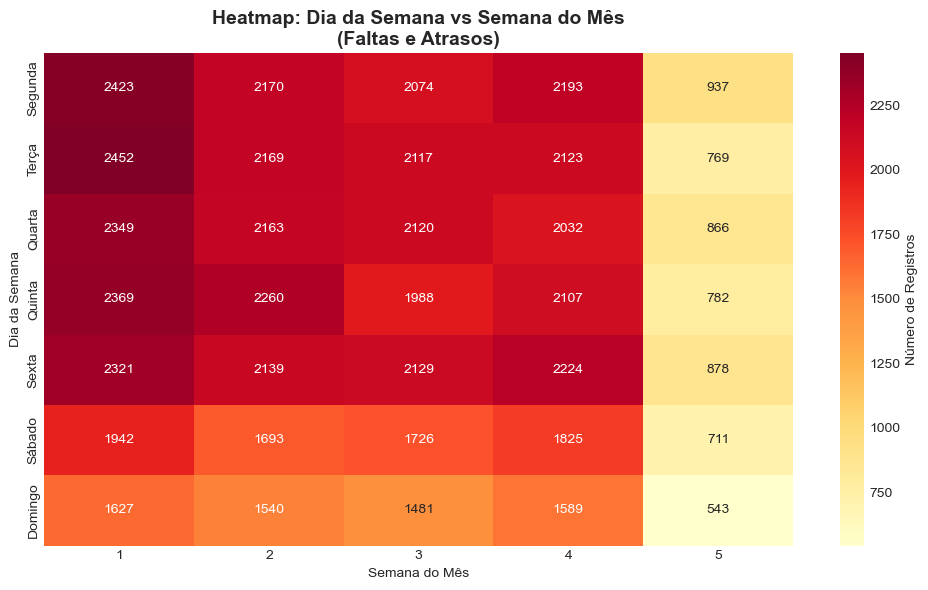

💡 Interpretação: Células mais escuras indicam combinações de dia/semana com mais faltas e atrasos


In [38]:
# Heatmap: Dia da Semana vs Semana do Mês
heatmap_data = df_faltas_atrasos.groupby(['dia_semana', 'semana_mes']).size().unstack(fill_value=0)

# Renomear índice para nomes dos dias
dias_nomes = {0: 'Segunda', 1: 'Terça', 2: 'Quarta', 3: 'Quinta', 4: 'Sexta', 5: 'Sábado', 6: 'Domingo'}
heatmap_data.index = heatmap_data.index.map(dias_nomes)

# Visualização
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', ax=ax, 
            cbar_kws={'label': 'Número de Registros'})
ax.set_title('Heatmap: Dia da Semana vs Semana do Mês\n(Faltas e Atrasos)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Semana do Mês')
ax.set_ylabel('Dia da Semana')
plt.tight_layout()
plt.show()

print("💡 Interpretação: Células mais escuras indicam combinações de dia/semana com mais faltas e atrasos")

---

## 7. FASE 5: Detecção de Padrões de Alerta (APENAS COLABORADORES ATIVOS)

**Nota Importante**: Esta seção analisa **apenas colaboradores ativos** para identificar padrões que podem indicar comportamentos preocupantes.

### 7.1 Preparação do Dataset de Ativos

In [40]:
# Filtrar apenas colaboradores ativos
df_ativos = df[df['is_ativo'] == 1].copy()

print("="*80)
print("🔍 ANÁLISE DE PADRÕES DE ALERTA - COLABORADORES ATIVOS")
print("="*80)

print(f"\n📊 Dataset de Colaboradores Ativos:")
print(f"   Total de registros: {len(df_ativos):,}")
print(f"   Colaboradores únicos ativos: {df_ativos['login_colaborador'].nunique():,}")
print(f"   Período: {df_ativos['Data'].min().strftime('%d/%m/%Y')} a {df_ativos['Data'].max().strftime('%d/%m/%Y')}")

# Calcular métricas por colaborador
print("\n⏳ Calculando métricas por colaborador...")

🔍 ANÁLISE DE PADRÕES DE ALERTA - COLABORADORES ATIVOS

📊 Dataset de Colaboradores Ativos:
   Total de registros: 681,281
   Colaboradores únicos ativos: 1,937
   Período: 01/01/2024 a 30/06/2025

⏳ Calculando métricas por colaborador...


### 7.2 Cálculo de Métricas por Colaborador

In [42]:
# Criar agregação por colaborador com múltiplas métricas
metricas_colaborador = df_ativos.groupby('login_colaborador').agg({
    'nome_colaborador': 'first',
    'operacao': 'first',
    'segmento': 'first',
    'categoria_profissional': 'first',
    'departamento': 'first',
    
    # Totais por tipo
    'is_falta_injustificada': 'sum',
    'is_falta_justificada': 'sum',
    'is_atraso': 'sum',
    'is_trabalho_pago': 'sum',
    
    # Flags específicas para padrões
    'is_segunda': 'sum',
    'is_sexta': 'sum',
    'is_inicio_mes': 'sum',
    'is_fim_mes': 'sum',
    
    # Total de dias
    'Data': 'count'
}).reset_index()

# Renomear colunas
metricas_colaborador.columns = [
    'login', 'nome', 'operacao', 'segmento', 'categoria_profissional', 'departamento',
    'faltas_injustificadas', 'faltas_justificadas', 'atrasos', 'trabalho_pago',
    'registros_segunda', 'registros_sexta', 'registros_inicio_mes', 'registros_fim_mes',
    'total_registros'
]

# Calcular métricas adicionais por colaborador

# 1. Total de faltas (justificadas + injustificadas)
metricas_colaborador['total_faltas'] = (metricas_colaborador['faltas_justificadas'] + 
                                         metricas_colaborador['faltas_injustificadas'])

# 2. Total de problemas (faltas + atrasos)
metricas_colaborador['total_problemas'] = (metricas_colaborador['total_faltas'] + 
                                            metricas_colaborador['atrasos'])

# 3. Taxa de absentismo (%)
metricas_colaborador['taxa_absentismo'] = (metricas_colaborador['total_problemas'] / 
                                            metricas_colaborador['total_registros'] * 100)

# 4. Calcular % de faltas/atrasos às segundas e sextas
# Primeiro, contar quantas segundas/sextas teve cada colaborador
df_ativos_faltas = df_ativos[df_ativos['categoria_absentismo'].isin(['Falta Justificada', 'Falta Injustificada', 'Atraso'])]

# Faltas às segundas
faltas_segundas = df_ativos_faltas[df_ativos_faltas['is_segunda'] == 1].groupby('login_colaborador').size()
faltas_sextas = df_ativos_faltas[df_ativos_faltas['is_sexta'] == 1].groupby('login_colaborador').size()

metricas_colaborador['faltas_segundas'] = metricas_colaborador['login'].map(faltas_segundas).fillna(0).astype(int)
metricas_colaborador['faltas_sextas'] = metricas_colaborador['login'].map(faltas_sextas).fillna(0).astype(int)

# % de faltas às segundas/sextas em relação ao total de faltas+atrasos
metricas_colaborador['pct_faltas_segundas'] = np.where(
    metricas_colaborador['total_problemas'] > 0,
    metricas_colaborador['faltas_segundas'] / metricas_colaborador['total_problemas'] * 100,
    0
)

metricas_colaborador['pct_faltas_sextas'] = np.where(
    metricas_colaborador['total_problemas'] > 0,
    metricas_colaborador['faltas_sextas'] / metricas_colaborador['total_problemas'] * 100,
    0
)

# 5. Faltas em início/fim de mês
faltas_inicio_mes = df_ativos_faltas[df_ativos_faltas['is_inicio_mes'] == 1].groupby('login_colaborador').size()
faltas_fim_mes = df_ativos_faltas[df_ativos_faltas['is_fim_mes'] == 1].groupby('login_colaborador').size()

metricas_colaborador['faltas_inicio_mes'] = metricas_colaborador['login'].map(faltas_inicio_mes).fillna(0).astype(int)
metricas_colaborador['faltas_fim_mes'] = metricas_colaborador['login'].map(faltas_fim_mes).fillna(0).astype(int)

# 6. Baixas médicas (código BM, BMP)
baixas_medicas = df_ativos[df_ativos['segmento_processado_codigo'].isin(['BM', 'BMP'])].groupby('login_colaborador').size()
metricas_colaborador['baixas_medicas'] = metricas_colaborador['login'].map(baixas_medicas).fillna(0).astype(int)

print(f"✅ Métricas calculadas para {len(metricas_colaborador)} colaboradores ativos!")
print(f"\n📋 Exemplo das métricas calculadas:")
metricas_colaborador.head(10)

✅ Métricas calculadas para 1937 colaboradores ativos!

📋 Exemplo das métricas calculadas:


,login,nome,operacao,segmento,categoria_profissional,departamento,faltas_injustificadas,faltas_justificadas,atrasos,trabalho_pago,registros_segunda,registros_sexta,registros_inicio_mes,registros_fim_mes,total_registros,total_faltas,total_problemas,taxa_absentismo,faltas_segundas,faltas_sextas,pct_faltas_segundas,pct_faltas_sextas,faltas_inicio_mes,faltas_fim_mes,baixas_medicas
0,009,Adão Matondo,Business Support,Ucall,GESTOR DE PROJECTOS,Direcção de Pessoas,0,1,0,47,8,8,12,13,48,1,1,2.08,0,0,0.00,0.00,1,0,1
1,011,Allen Leal,Business Support,Ucall,DIRECTOR GERAL ADJUNTO,Direcção Geral,0,0,0,49,10,9,13,14,49,0,0,0.00,0,0,0.00,0.00,0,0,0
2,028,Evânea Santos,Actividades Corporativas,Ucall,TÉCNICO DE HSST,Direcção de Pessoas,0,5,0,102,24,21,23,38,108,5,5,4.63,1,2,20.00,40.00,0,2,4
3,06390,Fineza Dala,ZAP Fibra,ZAP Fibra_BO/ATRASOS,ASSISTENTE DE CONTACT CENTER (N2),Direcção de Negócio,0,0,3,32,4,8,18,7,44,0,3,6.82,0,0,0.00,0.00,1,0,0
4,06428,Leonel Manuel,Unitel Village,Outbound,ASSISTENTE DE CONTACT CENTER (N2),Direcção de Negócio,0,0,0,13,2,3,4,0,14,0,0,0.00,0,0,0.00,0.00,0,0,0
5,06482,Teresa Zangui João Simão,Unitel Alpha,VLVC+LVC,ASSISTENTE DE CONTACT CENTER (N1),Direcção de Negócio,1,108,35,268,97,108,159,197,718,109,144,20.06,20,21,13.89,14.58,43,41,196
6,06496,Lubambi Alberto,ZAP - Outbound,Zap Outbond,SUPERVISOR OPERACIONAL,Direcção de Negócio,1,0,54,409,172,157,211,280,934,1,55,5.89,10,7,18.18,12.73,16,22,0
7,06512,Luzaisso Taty,TAAG,TAAG_Inbound - Geral,ASSISTENTE DE CALL CENTER,Direcção de Negócio,0,3,7,398,189,196,202,268,990,3,10,1.01,1,3,10.00,30.00,1,0,3
8,06585,Rosa Chegado,Unitel Alpha,MLVC+MVC,ASSISTENTE DE CONTACT CENTER (N1),Direcção de Negócio,0,9,24,113,51,58,62,74,295,9,33,11.19,5,7,15.15,21.21,9,9,9
9,06674,Solano Moisés,TAAG,TAAG,ASSISTENTE DE CONTACT CENTER (N3),Direcção de Negócio,0,11,23,453,149,154,209,257,903,11,34,3.77,6,7,17.65,20.59,12,11,8


### 7.3 Padrão de Alerta 1: Faltas Injustificadas Recorrentes

🚨 PADRÃO DE ALERTA 1: FALTAS INJUSTIFICADAS RECORRENTES

📊 Estatísticas:
   Colaboradores com pelo menos 1 falta injustificada: 813
   Total de faltas injustificadas: 5,172
   Média de faltas injustificadas por colaborador: 6.36
   Mediana: 3
   Máximo: 52

📈 Percentis:
   75%: 7 faltas
   90%: 19 faltas
   95%: 25 faltas

🔝 Top 20 Colaboradores com Mais Faltas Injustificadas:
login                                    nome                               operacao                               segmento  faltas_injustificadas  atrasos  taxa_absentismo
 1923                     Bernarda Nascimento                           Unitel Alpha                          HVC + Premium                     52       17            38.40
11018          Arsénio Germano Aleixo António Unitel Money - BRIGADISTAS Outsourcing Unitel Money - BRIGADISTAS Outsourcing                     44        3            26.26
10259          Josemar Luís Ramos de Oliveira UNITEL NET CASA 5G_Luanda_ Outsourcing                 

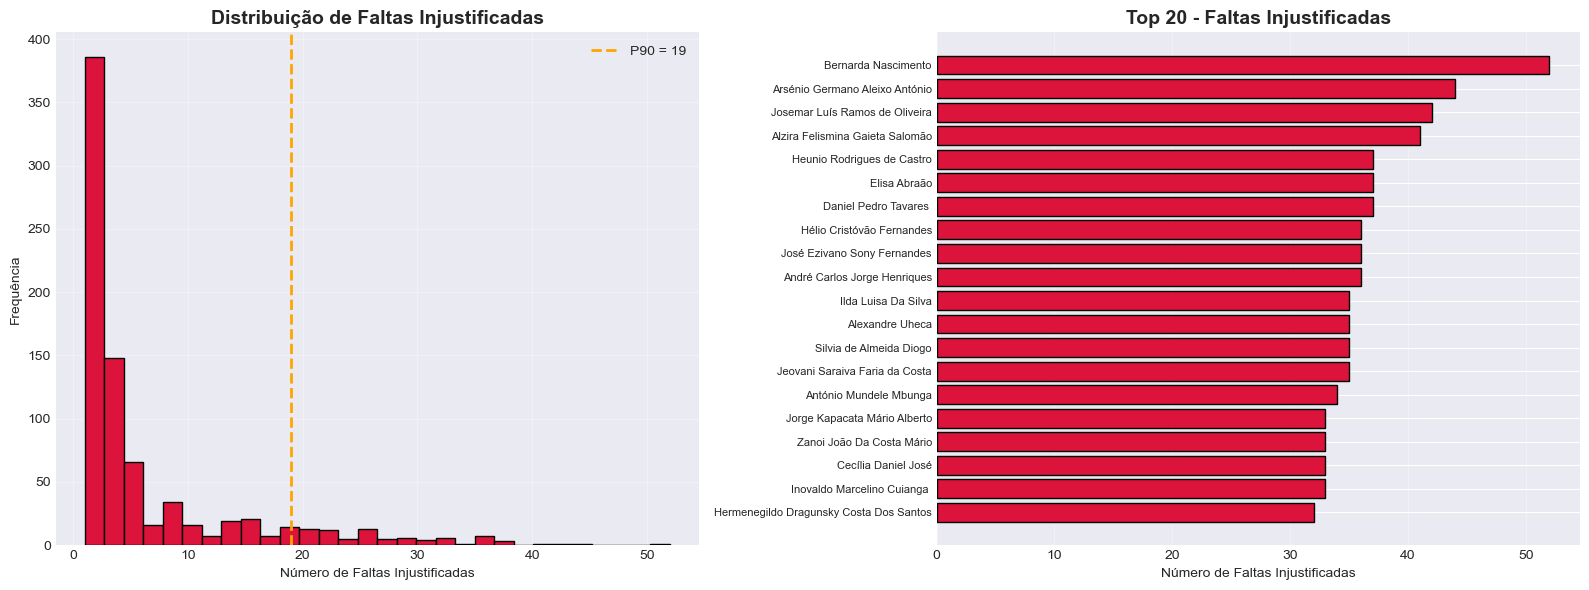

In [44]:
# Padrão 1: Faltas Injustificadas Recorrentes
print("="*80)
print("🚨 PADRÃO DE ALERTA 1: FALTAS INJUSTIFICADAS RECORRENTES")
print("="*80)

# Filtrar colaboradores com faltas injustificadas
colaboradores_faltas_inj = metricas_colaborador[metricas_colaborador['faltas_injustificadas'] > 0].copy()
colaboradores_faltas_inj = colaboradores_faltas_inj.sort_values('faltas_injustificadas', ascending=False)

print(f"\n📊 Estatísticas:")
print(f"   Colaboradores com pelo menos 1 falta injustificada: {len(colaboradores_faltas_inj)}")
print(f"   Total de faltas injustificadas: {colaboradores_faltas_inj['faltas_injustificadas'].sum():,}")
print(f"   Média de faltas injustificadas por colaborador: {colaboradores_faltas_inj['faltas_injustificadas'].mean():.2f}")
print(f"   Mediana: {colaboradores_faltas_inj['faltas_injustificadas'].median():.0f}")
print(f"   Máximo: {colaboradores_faltas_inj['faltas_injustificadas'].max():.0f}")

# Percentis
p75 = colaboradores_faltas_inj['faltas_injustificadas'].quantile(0.75)
p90 = colaboradores_faltas_inj['faltas_injustificadas'].quantile(0.90)
p95 = colaboradores_faltas_inj['faltas_injustificadas'].quantile(0.95)

print(f"\n📈 Percentis:")
print(f"   75%: {p75:.0f} faltas")
print(f"   90%: {p90:.0f} faltas")
print(f"   95%: {p95:.0f} faltas")

# Top 20 colaboradores com mais faltas injustificadas
print(f"\n🔝 Top 20 Colaboradores com Mais Faltas Injustificadas:")
top20_faltas_inj = colaboradores_faltas_inj.head(20)[['login', 'nome', 'operacao', 'segmento', 
                                                        'faltas_injustificadas', 'atrasos', 'taxa_absentismo']]
print(top20_faltas_inj.to_string(index=False))

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Distribuição
colaboradores_faltas_inj['faltas_injustificadas'].hist(bins=30, ax=axes[0], 
                                                        color='crimson', edgecolor='black')
axes[0].axvline(p90, color='orange', linestyle='--', linewidth=2, label=f'P90 = {p90:.0f}')
axes[0].set_title('Distribuição de Faltas Injustificadas', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Número de Faltas Injustificadas')
axes[0].set_ylabel('Frequência')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Gráfico 2: Top 20
top20_faltas_inj_plot = top20_faltas_inj.head(20).sort_values('faltas_injustificadas')
axes[1].barh(range(len(top20_faltas_inj_plot)), top20_faltas_inj_plot['faltas_injustificadas'], 
             color='crimson', edgecolor='black')
axes[1].set_yticks(range(len(top20_faltas_inj_plot)))
axes[1].set_yticklabels(top20_faltas_inj_plot['nome'], fontsize=8)
axes[1].set_xlabel('Número de Faltas Injustificadas')
axes[1].set_title('Top 20 - Faltas Injustificadas', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)

### 7.4 Padrão de Alerta 2: Atrasos Crónicos

🚨 PADRÃO DE ALERTA 2: ATRASOS CRÓNICOS

📊 Estatísticas:
   Colaboradores com pelo menos 1 atraso: 1373
   Total de atrasos: 21,173
   Média de atrasos por colaborador: 15.42
   Mediana: 9
   Máximo: 193

📈 Percentis:
   75%: 21 atrasos
   90%: 37 atrasos
   95%: 52 atrasos

🔝 Top 20 Colaboradores com Mais Atrasos:
login                                   nome                 operacao             segmento  atrasos  faltas_injustificadas  taxa_absentismo
07952                        Regina Fernando Actividades Corporativas                Ucall      193                      0            22.18
09393              Ivanilson Gaudêncio Pinto Actividades Corporativas                Ucall      158                      0            15.68
10516            Jiovann Manuel Correia Meti                     TAAG                 TAAG      118                      1            19.30
 4754                           Adilson Bole             Unitel Alpha           Backoffice      117                      0  

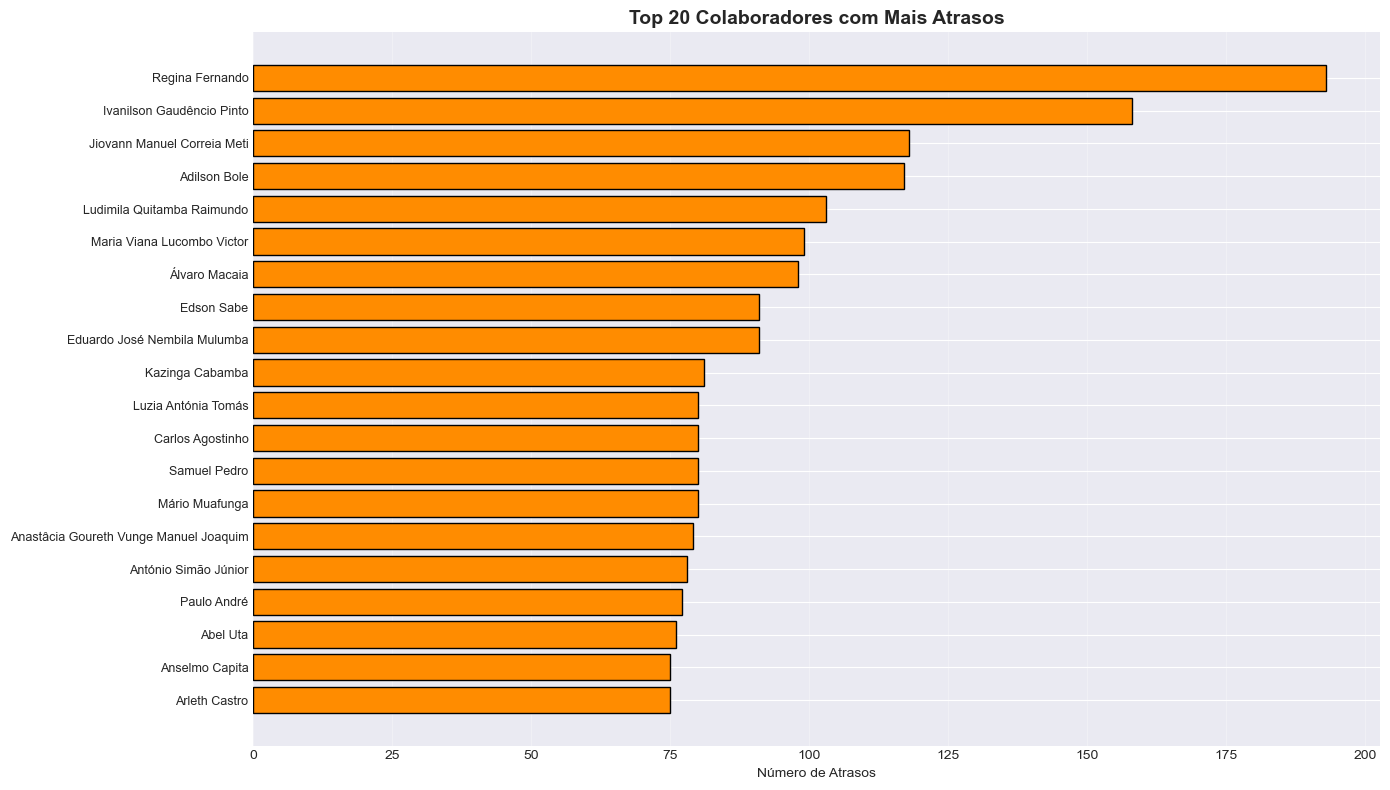

In [46]:
# Padrão 2: Atrasos Crónicos
print("="*80)
print("🚨 PADRÃO DE ALERTA 2: ATRASOS CRÓNICOS")
print("="*80)

# Filtrar colaboradores com atrasos
colaboradores_atrasos = metricas_colaborador[metricas_colaborador['atrasos'] > 0].copy()
colaboradores_atrasos = colaboradores_atrasos.sort_values('atrasos', ascending=False)

print(f"\n📊 Estatísticas:")
print(f"   Colaboradores com pelo menos 1 atraso: {len(colaboradores_atrasos)}")
print(f"   Total de atrasos: {colaboradores_atrasos['atrasos'].sum():,}")
print(f"   Média de atrasos por colaborador: {colaboradores_atrasos['atrasos'].mean():.2f}")
print(f"   Mediana: {colaboradores_atrasos['atrasos'].median():.0f}")
print(f"   Máximo: {colaboradores_atrasos['atrasos'].max():.0f}")

# Percentis
p75_atr = colaboradores_atrasos['atrasos'].quantile(0.75)
p90_atr = colaboradores_atrasos['atrasos'].quantile(0.90)
p95_atr = colaboradores_atrasos['atrasos'].quantile(0.95)

print(f"\n📈 Percentis:")
print(f"   75%: {p75_atr:.0f} atrasos")
print(f"   90%: {p90_atr:.0f} atrasos")
print(f"   95%: {p95_atr:.0f} atrasos")

# Top 20 colaboradores com mais atrasos
print(f"\n🔝 Top 20 Colaboradores com Mais Atrasos:")
top20_atrasos = colaboradores_atrasos.head(20)[['login', 'nome', 'operacao', 'segmento', 
                                                  'atrasos', 'faltas_injustificadas', 'taxa_absentismo']]
print(top20_atrasos.to_string(index=False))

# Visualização
fig, ax = plt.subplots(figsize=(14, 8))
top20_atrasos_plot = top20_atrasos.head(20).sort_values('atrasos')
ax.barh(range(len(top20_atrasos_plot)), top20_atrasos_plot['atrasos'], 
        color='darkorange', edgecolor='black')
ax.set_yticks(range(len(top20_atrasos_plot)))
ax.set_yticklabels(top20_atrasos_plot['nome'], fontsize=9)
ax.set_xlabel('Número de Atrasos')
ax.set_title('Top 20 Colaboradores com Mais Atrasos', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*80)

### 7.5 Padrão de Alerta 3: Faltas Estratégicas (Segundas/Sextas)

🚨 PADRÃO DE ALERTA 3: FALTAS ESTRATÉGICAS (SEGUNDAS/SEXTAS)

📊 Estatísticas - Padrão Segunda-feira:
   Colaboradores com ≥30% de faltas/atrasos às segundas: 57
   Percentagem média de faltas às segundas (deste grupo): 36.8%
   Máximo: 66.7%

📊 Estatísticas - Padrão Sexta-feira:
   Colaboradores com ≥30% de faltas/atrasos às sextas: 61
   Percentagem média de faltas às sextas (deste grupo): 35.2%
   Máximo: 50.0%

🔝 Top 20 Colaboradores com Padrão 'Segunda-feira':
   (Pelo menos 5 problemas e ≥30% às segundas)
login                                     nome                               operacao  faltas_segundas  total_problemas  pct_faltas_segundas
10212       António Filomento dos Santos Queta UNITEL NET CASA 5G_Luanda_ Outsourcing                4                6                66.67
09701 Claúdio Benedito Ferreira Roque de Sousa               Actividades Corporativas                7               12                58.33
10015          Ladislau Laudomiro Afonso Nunes UNITEL NET CASA

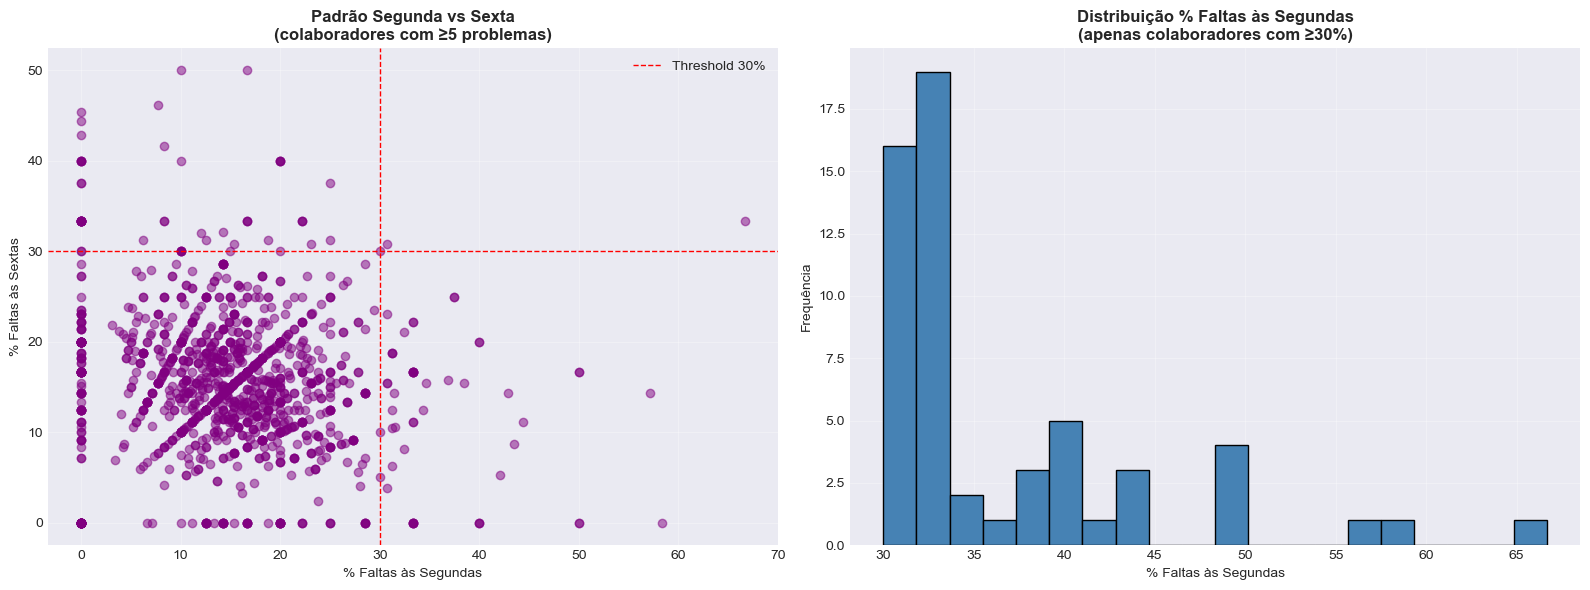

In [48]:
# Padrão 3: Faltas Estratégicas (Segundas/Sextas - Extensão de Fim de Semana)
print("="*80)
print("🚨 PADRÃO DE ALERTA 3: FALTAS ESTRATÉGICAS (SEGUNDAS/SEXTAS)")
print("="*80)

# Filtrar colaboradores com problemas às segundas ou sextas
# Consideramos "suspeito" se > 30% das faltas/atrasos são às segundas OU sextas
threshold_pct = 30  # 30% ou mais é considerado padrão suspeito

colaboradores_segundas = metricas_colaborador[
    (metricas_colaborador['pct_faltas_segundas'] >= threshold_pct) & 
    (metricas_colaborador['total_problemas'] >= 5)  # Pelo menos 5 problemas para ter amostra significativa
].sort_values('pct_faltas_segundas', ascending=False)

colaboradores_sextas = metricas_colaborador[
    (metricas_colaborador['pct_faltas_sextas'] >= threshold_pct) & 
    (metricas_colaborador['total_problemas'] >= 5)
].sort_values('pct_faltas_sextas', ascending=False)

print(f"\n📊 Estatísticas - Padrão Segunda-feira:")
print(f"   Colaboradores com ≥{threshold_pct}% de faltas/atrasos às segundas: {len(colaboradores_segundas)}")
if len(colaboradores_segundas) > 0:
    print(f"   Percentagem média de faltas às segundas (deste grupo): {colaboradores_segundas['pct_faltas_segundas'].mean():.1f}%")
    print(f"   Máximo: {colaboradores_segundas['pct_faltas_segundas'].max():.1f}%")

print(f"\n📊 Estatísticas - Padrão Sexta-feira:")
print(f"   Colaboradores com ≥{threshold_pct}% de faltas/atrasos às sextas: {len(colaboradores_sextas)}")
if len(colaboradores_sextas) > 0:
    print(f"   Percentagem média de faltas às sextas (deste grupo): {colaboradores_sextas['pct_faltas_sextas'].mean():.1f}%")
    print(f"   Máximo: {colaboradores_sextas['pct_faltas_sextas'].max():.1f}%")

# Top 20 - Segundas
if len(colaboradores_segundas) > 0:
    print(f"\n🔝 Top 20 Colaboradores com Padrão 'Segunda-feira':")
    print(f"   (Pelo menos 5 problemas e ≥{threshold_pct}% às segundas)")
    top20_segundas = colaboradores_segundas.head(20)[['login', 'nome', 'operacao', 
                                                        'faltas_segundas', 'total_problemas', 
                                                        'pct_faltas_segundas']]
    print(top20_segundas.to_string(index=False))

# Top 20 - Sextas
if len(colaboradores_sextas) > 0:
    print(f"\n🔝 Top 20 Colaboradores com Padrão 'Sexta-feira':")
    print(f"   (Pelo menos 5 problemas e ≥{threshold_pct}% às sextas)")
    top20_sextas = colaboradores_sextas.head(20)[['login', 'nome', 'operacao', 
                                                    'faltas_sextas', 'total_problemas', 
                                                    'pct_faltas_sextas']]
    print(top20_sextas.to_string(index=False))

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot: % faltas segundas vs % faltas sextas
scatter_data = metricas_colaborador[metricas_colaborador['total_problemas'] >= 5]
axes[0].scatter(scatter_data['pct_faltas_segundas'], scatter_data['pct_faltas_sextas'], 
                alpha=0.5, color='purple')
axes[0].axhline(threshold_pct, color='red', linestyle='--', linewidth=1, label=f'Threshold {threshold_pct}%')
axes[0].axvline(threshold_pct, color='red', linestyle='--', linewidth=1)
axes[0].set_xlabel('% Faltas às Segundas')
axes[0].set_ylabel('% Faltas às Sextas')
axes[0].set_title('Padrão Segunda vs Sexta\n(colaboradores com ≥5 problemas)', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Distribuição de % de faltas às segundas
if len(colaboradores_segundas) > 0:
    colaboradores_segundas['pct_faltas_segundas'].hist(bins=20, ax=axes[1], 
                                                        color='steelblue', edgecolor='black')
    axes[1].set_xlabel('% Faltas às Segundas')
    axes[1].set_ylabel('Frequência')
    axes[1].set_title('Distribuição % Faltas às Segundas\n(apenas colaboradores com ≥30%)', 
                      fontsize=12, fontweight='bold')
    axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)

### 7.6 Padrão de Alerta 4: Baixas Médicas Frequentes

🚨 PADRÃO DE ALERTA 4: BAIXAS MÉDICAS FREQUENTES

📊 Estatísticas:
   Colaboradores com pelo menos 1 baixa médica: 950
   Total de dias de baixa médica: 11,212
   Média por colaborador (com baixa): 11.80
   Mediana: 6
   Máximo: 223

📈 Percentis:
   90%: 21 dias
   95%: 35 dias

🔝 Top 20 Colaboradores com Mais Baixas Médicas:
login                          nome                     operacao               segmento  baixas_medicas  faltas_injustificadas  atrasos
07565                  Carla Afonso     Actividades Corporativas                  Ucall             223                      1        0
 5416            Walter da Ambrósio                 Unitel Alpha               MLVC+MVC             202                      0       14
 1923           Bernarda Nascimento                 Unitel Alpha          HVC + Premium             201                     52       17
 6006                  José Alberto                 Unitel Alpha               MLVC+MVC             199                      0    

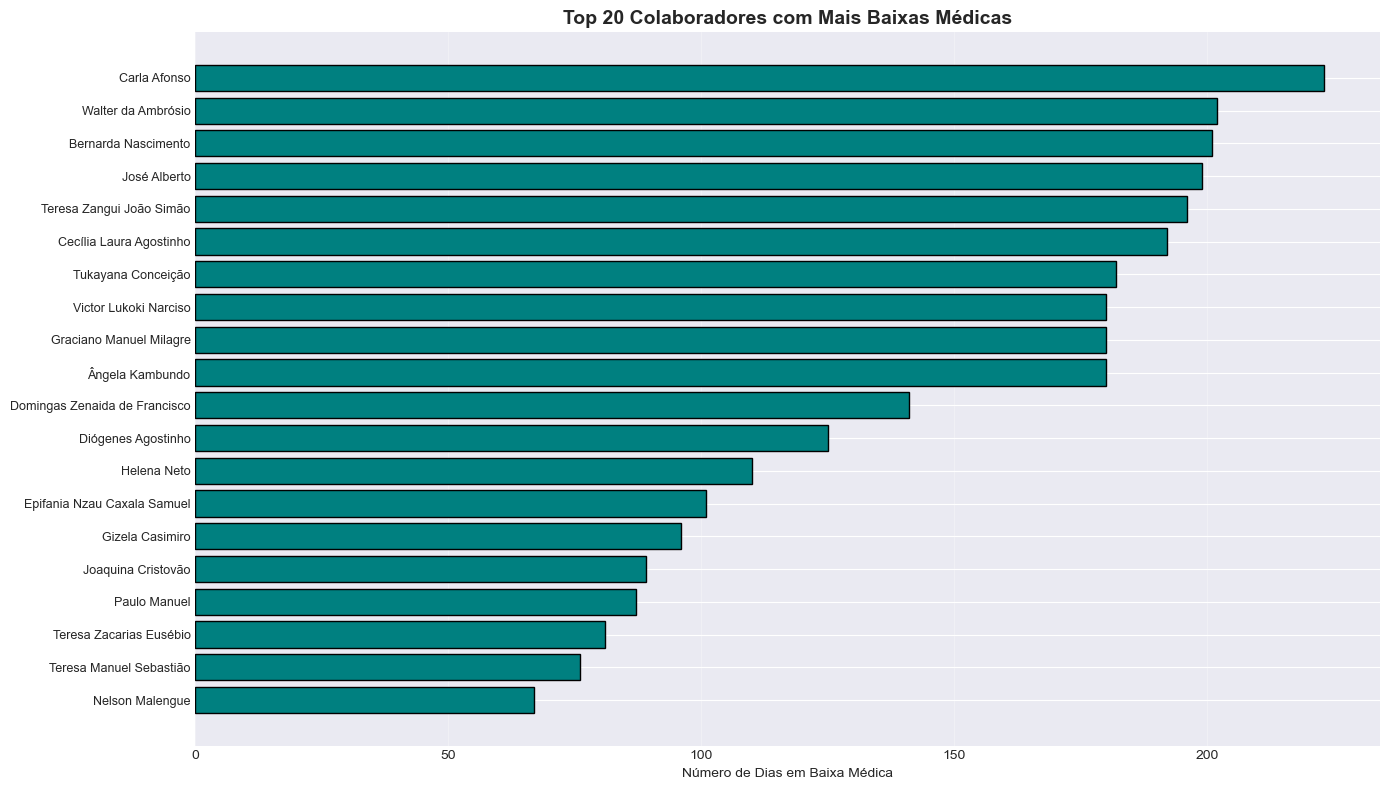

In [50]:
# Padrão 4: Baixas Médicas Frequentes
print("="*80)
print("🚨 PADRÃO DE ALERTA 4: BAIXAS MÉDICAS FREQUENTES")
print("="*80)

# Filtrar colaboradores com baixas médicas
colaboradores_baixas = metricas_colaborador[metricas_colaborador['baixas_medicas'] > 0].copy()
colaboradores_baixas = colaboradores_baixas.sort_values('baixas_medicas', ascending=False)

print(f"\n📊 Estatísticas:")
print(f"   Colaboradores com pelo menos 1 baixa médica: {len(colaboradores_baixas)}")
print(f"   Total de dias de baixa médica: {colaboradores_baixas['baixas_medicas'].sum():,}")
print(f"   Média por colaborador (com baixa): {colaboradores_baixas['baixas_medicas'].mean():.2f}")
print(f"   Mediana: {colaboradores_baixas['baixas_medicas'].median():.0f}")
print(f"   Máximo: {colaboradores_baixas['baixas_medicas'].max():.0f}")

# Percentis
p90_bx = colaboradores_baixas['baixas_medicas'].quantile(0.90)
p95_bx = colaboradores_baixas['baixas_medicas'].quantile(0.95)

print(f"\n📈 Percentis:")
print(f"   90%: {p90_bx:.0f} dias")
print(f"   95%: {p95_bx:.0f} dias")

# Top 20
print(f"\n🔝 Top 20 Colaboradores com Mais Baixas Médicas:")
top20_baixas = colaboradores_baixas.head(20)[['login', 'nome', 'operacao', 'segmento', 
                                                'baixas_medicas', 'faltas_injustificadas', 
                                                'atrasos']]
print(top20_baixas.to_string(index=False))

# Visualização
fig, ax = plt.subplots(figsize=(14, 8))
top20_baixas_plot = top20_baixas.head(20).sort_values('baixas_medicas')
ax.barh(range(len(top20_baixas_plot)), top20_baixas_plot['baixas_medicas'], 
        color='teal', edgecolor='black')
ax.set_yticks(range(len(top20_baixas_plot)))
ax.set_yticklabels(top20_baixas_plot['nome'], fontsize=9)
ax.set_xlabel('Número de Dias em Baixa Médica')
ax.set_title('Top 20 Colaboradores com Mais Baixas Médicas', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*80)

### 7.7 Resumo Final: Tabela Consolidada de Colaboradores de Atenção

In [52]:
# Tabela Consolidada Final
print("="*80)
print("📋 TABELA CONSOLIDADA - TOP 50 COLABORADORES DE ATENÇÃO")
print("="*80)

# Ordenar por taxa de absentismo global
top50_geral = metricas_colaborador.sort_values('taxa_absentismo', ascending=False).head(50)

# Selecionar colunas relevantes
tabela_final = top50_geral[[
    'login', 'nome', 'operacao', 'segmento', 'categoria_profissional',
    'faltas_injustificadas', 'faltas_justificadas', 'atrasos', 'baixas_medicas',
    'total_problemas', 'taxa_absentismo',
    'pct_faltas_segundas', 'pct_faltas_sextas'
]].copy()

# Arredondar percentagens
tabela_final['taxa_absentismo'] = tabela_final['taxa_absentismo'].round(2)
tabela_final['pct_faltas_segundas'] = tabela_final['pct_faltas_segundas'].round(1)
tabela_final['pct_faltas_sextas'] = tabela_final['pct_faltas_sextas'].round(1)

print("\n🔝 Top 50 Colaboradores por Taxa de Absentismo:")
print(tabela_final.to_string(index=False))

# Resumo por operação
print(f"\n\n📊 Distribuição dos Top 50 por Operação:")
dist_top50_op = tabela_final['operacao'].value_counts()
for op, count in dist_top50_op.items():
    pct = count / 50 * 100
    print(f"   {op}: {count} colaboradores ({pct:.1f}%)")

# Exportar para CSV (opcional)
# tabela_final.to_csv('top50_colaboradores_atencao.csv', index=False, encoding='utf-8-sig')
# print("\n✅ Tabela exportada para 'top50_colaboradores_atencao.csv'")

print("\n" + "="*80)

📋 TABELA CONSOLIDADA - TOP 50 COLABORADORES DE ATENÇÃO

🔝 Top 50 Colaboradores por Taxa de Absentismo:
login                                     nome                                operacao                                segmento              categoria_profissional  faltas_injustificadas  faltas_justificadas  atrasos  baixas_medicas  total_problemas  taxa_absentismo  pct_faltas_segundas  pct_faltas_sextas
10115                    Armando Chicovo Samba                        Business Support                                   Ucall                 AUXILIAR DE LIMPEZA                      0                   31        0               0               31           100.00                16.10              12.90
08583                       Edvandro Peliganga                                    TAAG                    TAAG_Inbound - Geral           ASSISTENTE DE CALL CENTER                     16                    0        0               0               16           100.00                18.8

---

## 8. Sumário Executivo - Principais Achados

Esta seção consolida os principais achados da análise para apresentação à direção.

In [54]:
print("="*80)
print("📊 SUMÁRIO EXECUTIVO - ANÁLISE DE ABSENTISMO")
print("="*80)

print(f"\n{'='*80}")
print("1️⃣ VISÃO GERAL")
print(f"{'='*80}")

total_colab = df['login_colaborador'].nunique()
colab_ativos = df[df['is_ativo']==1]['login_colaborador'].nunique()
periodo_dias = (df['Data'].max() - df['Data'].min()).days + 1

print(f"   • Período analisado: {df['Data'].min().strftime('%d/%m/%Y')} a {df['Data'].max().strftime('%d/%m/%Y')} ({periodo_dias} dias)")
print(f"   • Total de colaboradores: {total_colab:,}")
print(f"   • Colaboradores ativos: {colab_ativos:,} ({colab_ativos/total_colab*100:.1f}%)")
print(f"   • Total de registros analisados: {len(df):,}")

print(f"\n{'='*80}")
print("2️⃣ DISTRIBUIÇÃO GERAL DE ABSENTISMO")
print(f"{'='*80}")

# Recalcular estatísticas principais
total_reg = len(df)
trabalho_pago = df['is_trabalho_pago'].sum()
faltas_just = df['is_falta_justificada'].sum()
faltas_inj = df['is_falta_injustificada'].sum()
atrasos_tot = df['is_atraso'].sum()
nao_contado = df['is_ausencia_nao_contada'].sum()

print(f"   • Trabalho Pago: {trabalho_pago:,} ({trabalho_pago/total_reg*100:.2f}%)")
print(f"   • Faltas Justificadas: {faltas_just:,} ({faltas_just/total_reg*100:.2f}%)")
print(f"   • Faltas Injustificadas: {faltas_inj:,} ({faltas_inj/total_reg*100:.2f}%)")
print(f"   • Atrasos: {atrasos_tot:,} ({atrasos_tot/total_reg*100:.2f}%)")
print(f"   • Não considerado no absentismo: {nao_contado:,} ({nao_contado/total_reg*100:.2f}%)")

print(f"\n{'='*80}")
print("3️⃣ PADRÕES TEMPORAIS")
print(f"{'='*80}")

# Recalcular para faltas e atrasos apenas
df_prob = df[df['categoria_absentismo'].isin(['Falta Justificada', 'Falta Injustificada', 'Atraso'])]
total_prob = len(df_prob)

seg_pct = df_prob['is_segunda'].sum() / total_prob * 100
sex_pct = df_prob['is_sexta'].sum() / total_prob * 100
inicio_mes_pct = df_prob['is_inicio_mes'].sum() / total_prob * 100
fim_mes_pct = df_prob['is_fim_mes'].sum() / total_prob * 100

print(f"   • Faltas/Atrasos às Segundas: {seg_pct:.1f}% do total")
print(f"   • Faltas/Atrasos às Sextas: {sex_pct:.1f}% do total")
print(f"   • Faltas/Atrasos no Início do Mês (dias 1-7): {inicio_mes_pct:.1f}%")
print(f"   • Faltas/Atrasos no Fim do Mês (dias 23+): {fim_mes_pct:.1f}%")

print(f"\n{'='*80}")
print("4️⃣ COLABORADORES ATIVOS - ALERTAS")
print(f"{'='*80}")

# Estatísticas dos colaboradores ativos
prob_colab = metricas_colaborador[metricas_colaborador['total_problemas'] > 0]

print(f"   • Colaboradores ativos com pelo menos 1 falta/atraso: {len(prob_colab):,}")
print(f"   • Com faltas injustificadas: {len(metricas_colaborador[metricas_colaborador['faltas_injustificadas'] > 0]):,}")
print(f"   • Com atrasos: {len(metricas_colaborador[metricas_colaborador['atrasos'] > 0]):,}")
print(f"   • Com baixas médicas: {len(metricas_colaborador[metricas_colaborador['baixas_medicas'] > 0]):,}")

if len(colaboradores_segundas) > 0:
    print(f"   • Com padrão 'Segunda-feira' (≥30% faltas às segundas): {len(colaboradores_segundas):,}")
if len(colaboradores_sextas) > 0:
    print(f"   • Com padrão 'Sexta-feira' (≥30% faltas às sextas): {len(colaboradores_sextas):,}")

print(f"\n{'='*80}")
print("5️⃣ TOP 10 COLABORADORES POR TAXA DE ABSENTISMO")
print(f"{'='*80}")

top10_final = metricas_colaborador.sort_values('taxa_absentismo', ascending=False).head(10)[
    ['login', 'nome', 'operacao', 'faltas_injustificadas', 'atrasos', 'taxa_absentismo']
]
print(top10_final.to_string(index=False))

print(f"\n{'='*80}")
print("6️⃣ RECOMENDAÇÕES")
print(f"{'='*80}")
print("""
   1. Revisar os Top 50 colaboradores identificados na tabela consolidada
   2. Investigar colaboradores com padrões de faltas às segundas/sextas (possível extensão de FDS)
   3. Analisar individualmente casos com >10 faltas injustificadas
   4. Monitorizar colaboradores com alta frequência de baixas médicas curtas
   5. Implementar sistema de alertas automático para padrões recorrentes
   6. Realizar reuniões individuais com colaboradores de risco alto
""")

print("="*80)
print("✅ ANÁLISE CONCLUÍDA")
print("="*80)

📊 SUMÁRIO EXECUTIVO - ANÁLISE DE ABSENTISMO

1️⃣ VISÃO GERAL
   • Período analisado: 01/01/2024 a 30/06/2025 (547 dias)
   • Total de colaboradores: 3,135
   • Colaboradores ativos: 1,937 (61.8%)
   • Total de registros analisados: 1,325,097

2️⃣ DISTRIBUIÇÃO GERAL DE ABSENTISMO
   • Trabalho Pago: 718,409 (54.22%)
   • Faltas Justificadas: 18,976 (1.43%)
   • Faltas Injustificadas: 5,582 (0.42%)
   • Atrasos: 38,273 (2.89%)
   • Não considerado no absentismo: 543,857 (41.04%)

3️⃣ PADRÕES TEMPORAIS
   • Faltas/Atrasos às Segundas: 15.6% do total
   • Faltas/Atrasos às Sextas: 15.4% do total
   • Faltas/Atrasos no Início do Mês (dias 1-7): 24.6%
   • Faltas/Atrasos no Fim do Mês (dias 23+): 27.8%

4️⃣ COLABORADORES ATIVOS - ALERTAS
   • Colaboradores ativos com pelo menos 1 falta/atraso: 1,623
   • Com faltas injustificadas: 813
   • Com atrasos: 1,373
   • Com baixas médicas: 950
   • Com padrão 'Segunda-feira' (≥30% faltas às segundas): 57
   • Com padrão 'Sexta-feira' (≥30% faltas à